<a href="https://colab.research.google.com/github/Alexandre77777/python_programming/blob/main/7.%20%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D0%B2%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%E2%84%969_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Теория №9. Ансамблевые методы в машинном обучении**

**Ансамблевые методы** — это подход в машинном обучении, при котором несколько моделей используются совместно для улучшения общей производительности и устойчивости предсказаний. Основная идея заключается в том, что объединение нескольких моделей может компенсировать ошибки отдельных моделей и снизить риск переобучения.



# **Бэггинг (Bootstrap Aggregating)**

### **Основная идея**

**Бэггинг** — это метод ансамблевого обучения, направленный на снижение дисперсии модели и повышение устойчивости предсказаний. Он достигается путем обучения нескольких моделей на различных подвыборках данных и последующего объединения их предсказаний.

### **Алгоритм бэггинга**

1. **Создание бутстрап-выборок**:
   - Из исходного набора данных размером $ N $ создаются $ B $ подвыборок такого же размера.
   - Каждая подвыборка формируется методом бутстрапа: случайный выбор элементов из исходного набора с возвращением.
   - В результате каждая бутстрап-выборка содержит некоторые повторяющиеся наблюдения и, возможно, пропущенные из исходного набора.

2. **Обучение базовых моделей**:
   - На каждом бутстрап-наборе обучается отдельная базовая модель.
   - Модели могут быть одного типа (гомогенные) или разных типов (гетерогенные).

3. **Объединение предсказаний**:
   - Для новых данных предсказания базовых моделей объединяются.
   - В задачах классификации часто используется голосование большинством (*majority voting*).
   - В задачах регрессии предсказания усредняются.

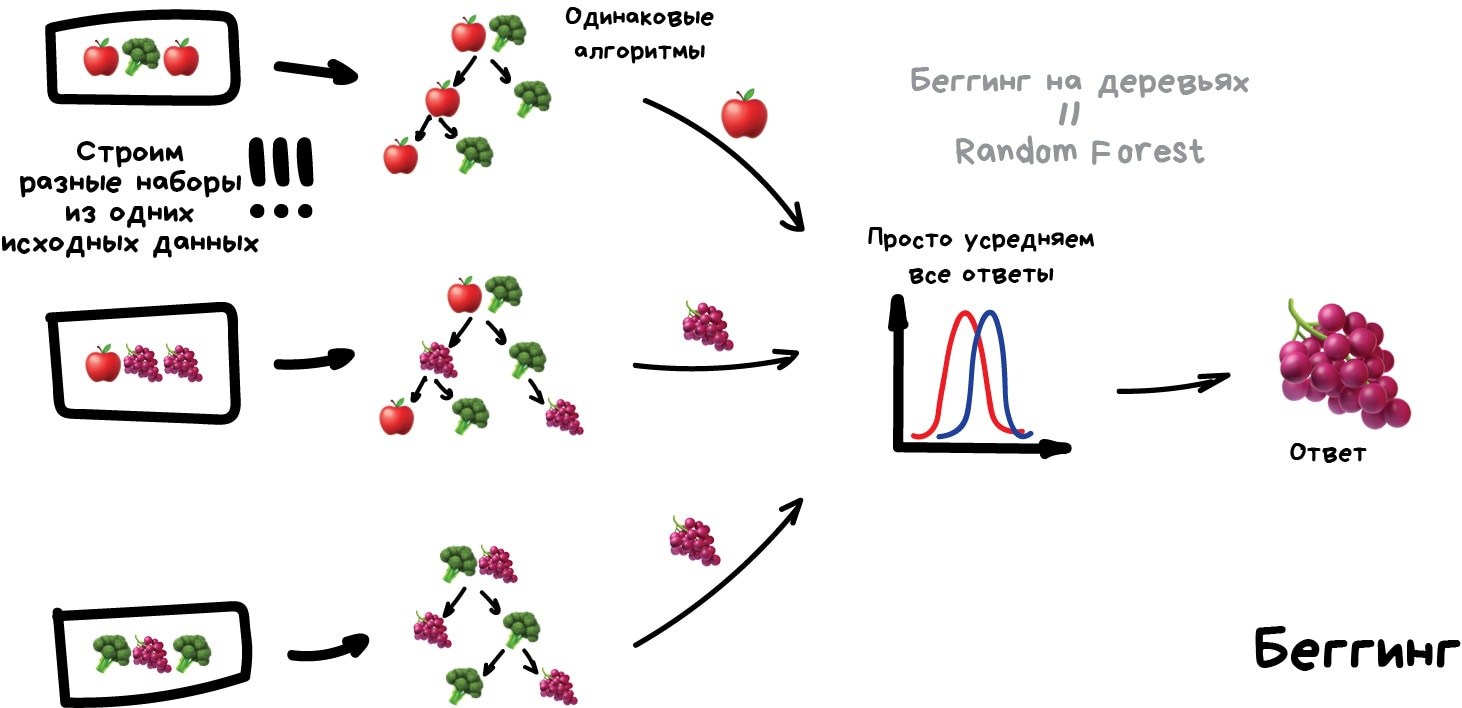

#### **Преимущества бэггинга:**

- **Снижение дисперсии**: Усреднение предсказаний нескольких моделей уменьшает разброс и делает модель более устойчивой.
- **Устойчивость к переобучению**: За счет разнообразия базовых моделей снижается риск переобучения.
- **Простота параллелизации**: Обучение базовых моделей и генерация предсказаний могут выполняться параллельно.

## **Объединение различных моделей в один ансамбль**

Помимо использования одинаковых базовых моделей, бэггинг позволяет объединять различные алгоритмы в одном ансамбле. Это может привести к улучшению производительности, поскольку разные модели могут захватывать разные аспекты данных.

### **Пример ансамбля из нейронной сети, SVM и дерева решений**

Мы создадим ансамбль **VotingClassifier\***, объединяющий:

- **Нейронную сеть**: Способна моделировать сложные нелинейные зависимости.
- **Метод опорных векторов (SVM)**: Эффективен в задачах с четкой разделимостью классов.
- **Дерево решений**: Строит модель классификации в виде древовидной структуры, разбивая пространство признаков на области, соответствующие классам. Легко интерпретируемо и может моделировать нелинейные зависимости.

И сравним его со всеми остальными бэггинговыми ансамблевыми алгоритмами из sklearn.

---

**\*VotingClassifier** из библиотеки scikit-learn - это метаклассификатор, который объединяет предсказания нескольких базовых классификаторов путем голосования Он позволяет строить ансамбли моделей классификации для повышения общей производительности и робастности.

#### **Шаг 1: Импорт необходимых библиотек**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Базовые модели
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Бэггинговые ансамблевые модели
from sklearn.ensemble import (
    VotingClassifier, RandomForestClassifier,
    BaggingClassifier, ExtraTreesClassifier, RandomTreesEmbedding
)

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### Шаг 2: Загрузка и подготовка данных

Будем использовать датасет рака молочной железы для задачи бинарной классификации.

In [ ]:
# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков для моделей, чувствительных к масштабу
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Шаг 3: Определение базовых моделей

In [ ]:
# Нейронная сеть
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Метод опорных векторов
svc = SVC(kernel='rbf', probability=True, random_state=42)

# Решающее дерево
dt = DecisionTreeClassifier(random_state=42)

#### Шаг 4: Определение бэггинговых ансамблевых моделей

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Использование RandomTreesEmbedding с логистической регрессией
rte = RandomTreesEmbedding(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
pipeline = make_pipeline(rte, lr)

# Ансамбль с мягким голосованием (VotingClassifier)
voting = VotingClassifier(
    estimators=[('mlp', mlp), ('svc', svc), ('rf', rf)],
    voting='soft'  # Используем вероятности классов
)

# Словарь всех моделей
models = {
    'Нейронная сеть (MLP)': mlp,
    'SVM': svc,
    'Дерево решений': dt,
    'Случайный лес': rf,
    'Бэггинг': bagging,
    'Extra Trees': et,
    'Random Trees Embedding': pipeline,
    'Ансамбль (Voting)': voting
}

#### Шаг 5: Обучение моделей

In [ ]:
for name, model in models.items():
    print(f"Обучение модели {name}...")
    if name in ['Нейронная сеть (MLP)', 'SVM', 'Ансамбль (Voting)']:
      model.fit(X_train_scaled, y_train)
    elif name == 'Random Trees Embedding':
      model.fit(X_train, y_train)
    else:
      model.fit(X_train, y_train)

Обучение модели Нейронная сеть (MLP)...
Обучение модели SVM...
Обучение модели Дерево решений...
Обучение модели Случайный лес...
Обучение модели Бэггинг...
Обучение модели Extra Trees...
Обучение модели Random Trees Embedding...
Обучение модели Ансамбль (Voting)...


#### Шаг 6: Предсказание и оценка моделей

In [ ]:
# Оценка точности моделей
accuracies = {}
for name, model in models.items():
    if name in ['Нейронная сеть (MLP)', 'SVM', 'Ансамбль (Voting)']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Вывод результатов
print("\nТочность моделей:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


Точность моделей:
Нейронная сеть (MLP): 0.9737
SVM: 0.9825
Дерево решений: 0.9474
Случайный лес: 0.9649
Бэггинг: 0.9561
Extra Trees: 0.9649
Random Trees Embedding: 0.9825
Ансамбль (Voting): 0.9825


#### Шаг 7: Визуализация производительности моделей

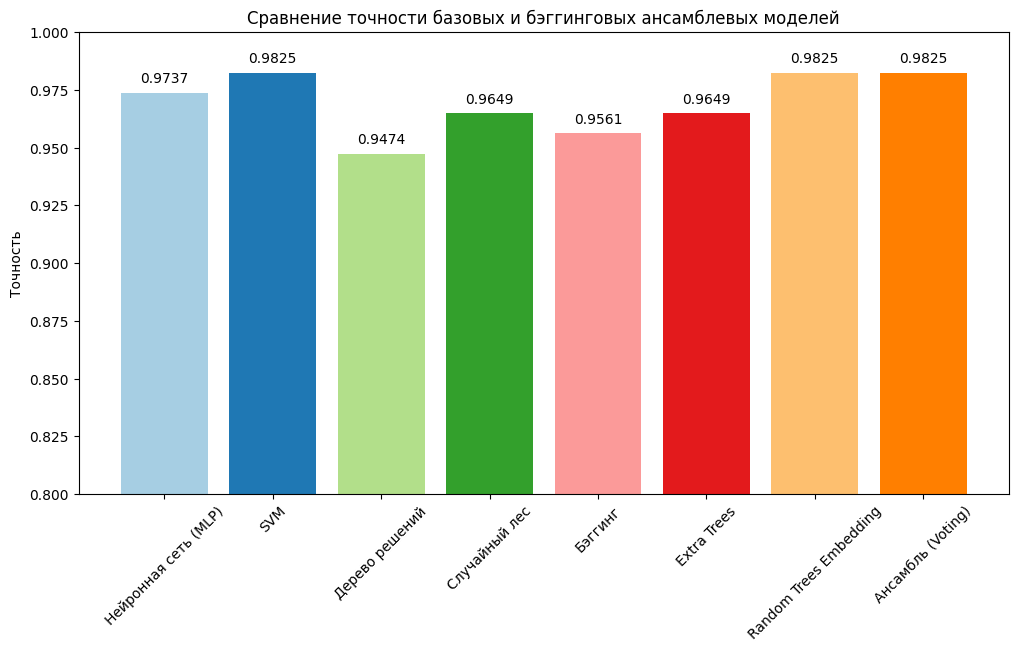

In [ ]:
# Построение столбчатой диаграммы точности моделей
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=plt.cm.Paired(range(len(accuracies))))
plt.title('Сравнение точности базовых и бэггинговых ансамблевых моделей')
plt.ylabel('Точность')
plt.ylim([0.8, 1.0])

# Отображение значений точности над столбцами
for bar, accuracy in zip(bars, accuracies.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.003, f'{accuracy:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

В нашем эксперименте точность ансамбля совпадает с точностью лучшей модели (SVM). Это может быть вызвано доминированием сильной модели, недостаточным разнообразием моделей, простым механизмом объединения, коррелированными ошибками или равными весами моделей.




#### **Что можно сделать:**

1. Увеличить разнообразие моделей (разные алгоритмы, параметры, подвыборки данных, признаки).
2. Изменить веса моделей пропорционально их точности.
3. Использовать продвинутые методы ансамблирования, например такие как стекинг.
4. Проанализировать ошибки моделей и улучшить их.
5. Исключить слабые модели из ансамбля.
6. Настроить гиперпараметры базовых моделей.
7. Увеличить количество базовых моделей.

**Рассмотрим еще один датасет и последуем этим советам:**

Мы будем использовать датасет о диабетиках [**Pima Indians**](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

##### Шаг 1: Загрузка и подготовка данных

In [ ]:
# Загрузим датасет Pima Indians Diabetes
# Датасет доступен по ссылке: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
# Зададим имена столбцов для удобства
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Считываем данные
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
                   names=columns)

# Разделение данных на признаки и целевую переменную
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Шаг 2: Определение и обучение базовых моделей

In [ ]:
# Создаем экземпляры моделей
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)
nb = GaussianNB()

# Обучение каждой модели
lr.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)  # Дерево решений не чувствительно к масштабу
svm.fit(X_train_scaled, y_train)
nb.fit(X_train_scaled, y_train)

##### Шаг 3: Оценка точности базовых моделей

In [ ]:
# Логистическая регрессия
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f'Точность Логистической регрессии: {acc_lr:.4f}')

# KNN
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'Точность KNN: {acc_knn:.4f}')

# Дерево решений
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Точность Дерева решений: {acc_dt:.4f}')

# SVM
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f'Точность SVM: {acc_svm:.4f}')

# Наивный Байес
y_pred_nb = nb.predict(X_test_scaled)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f'Точность Наивного Байеса: {acc_nb:.4f}')

Точность Логистической регрессии: 0.7143
Точность KNN: 0.7013
Точность Дерева решений: 0.7273
Точность SVM: 0.7532
Точность Наивного Байеса: 0.7078


##### Шаг 4: Создание и обучение ансамбля VotingClassifier

In [ ]:
# Создаем ансамбль с мягким голосованием
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('svm', svm), ('nb', nb)],
    voting='soft'  # Используем вероятности предсказаний
)

# Обучение ансамбля
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('nb', GaussianNB())],
                 voting='soft')

##### Шаг 5: Оценка точности ансамбля

In [ ]:
# Оценка ансамбля
y_pred_ensemble = voting_clf.predict(X_test_scaled)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Точность Ансамбля с голосованием: {acc_ensemble:.4f}')

# Сравнение точностей
models = ['Логистическая регрессия', 'KNN', 'Дерево решений', 'SVM', 'Наивный Байес', 'Ансамбль VotingClassifier']
accuracies = [acc_lr, acc_knn, acc_dt, acc_svm, acc_nb, acc_ensemble]

Точность Ансамбля с голосованием: 0.7662


##### Шаг 6: Визуализация результатов

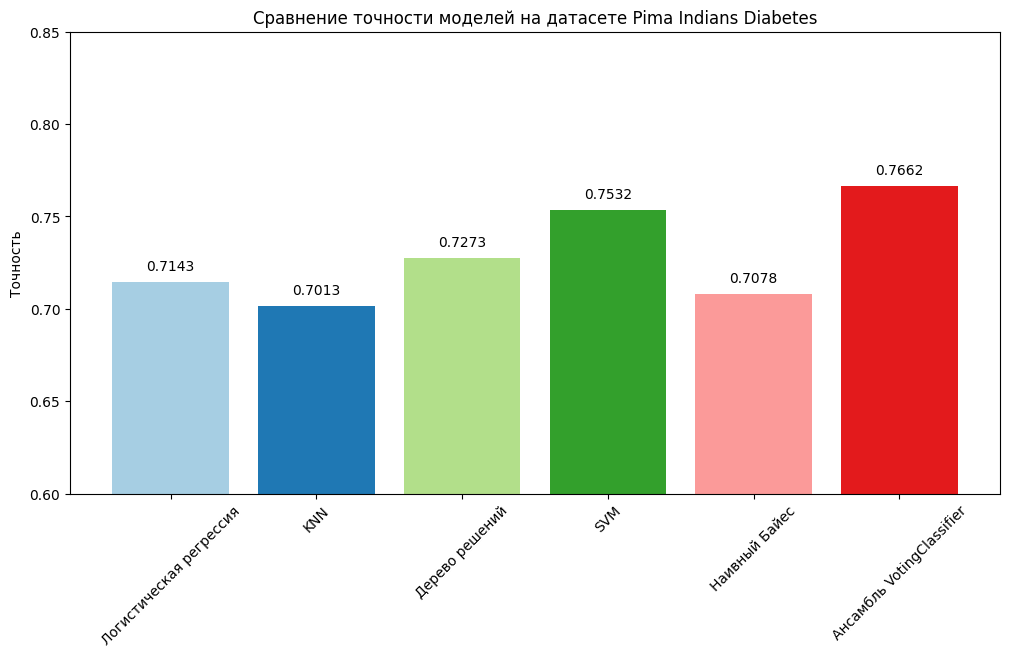

In [ ]:
# Построение столбчатой диаграммы точности моделей
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(models)), accuracies, color=plt.cm.Paired(range(len(models))))
plt.title('Сравнение точности моделей на датасете Pima Indians Diabetes')
plt.ylabel('Точность')
plt.ylim([0.60, 0.85])

# Отображение названий моделей на оси x
plt.xticks(range(len(models)), models, rotation=45)

# Отображение значений точности над столбцами
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

- Ансамбль с голосованием показал точность 0.7662, что выше, чем у каждой из базовых моделей.
- Из базовых моделей SVM показал лучшую точность 0.7532.
- Ансамбль смог объединить преимущества различных моделей и улучшить общую точность.
- KNN и Наивный Байес продемонстрировали самую низкую точность среди базовых моделей.
- Логистическая регрессия и Дерево решений показали средние результаты.

## **Выводы по разделу**


- **Бэггинг** снижает дисперсию модели и повышает устойчивость предсказаний.
- **Объединение разнородных моделей** может улучшить общую производительность, поскольку разные алгоритмы могут улавливать различные аспекты данных.
- **Ансамбль** с мягким голосованием (soft voting) использует вероятности предсказаний, что часто приводит к более точным результатам, чем жесткое голосование (hard voting).
- **Комбинирование моделей** позволяет компенсировать слабости отдельных алгоритмов за счет сильных сторон других.

**Дополнительные методы:**

- **Стекинг (Stacking):** Более сложный ансамблевый метод, где предсказания базовых моделей используются в качестве признаков для мета-модели.
- **Багоутинг (Bagging Out):** Техника увеличения размера обучающей выборки путем включения дополнительно сгенерированных или синтетических данных.

# **Градиентный бустинг (Gradient Boosted)**

**Градиентный бустинг** **(Gradient Boosting)** - это эффективный метод машинного обучения, который объединяет ансамбль слабых предсказывающих моделей в одну сильную модель. Он широко применяется на практике и часто показывает превосходные результаты.

В основе градиентного бустинга лежит идея **бустинга** - итеративного процесса построения ансамбля моделей. На каждой итерации новая модель обучается так, чтобы исправлять ошибки предыдущих моделей Таким образом, каждая следующая модель фокусируется на более сложных примерах, которые не удалось правильно классифицировать ранее.

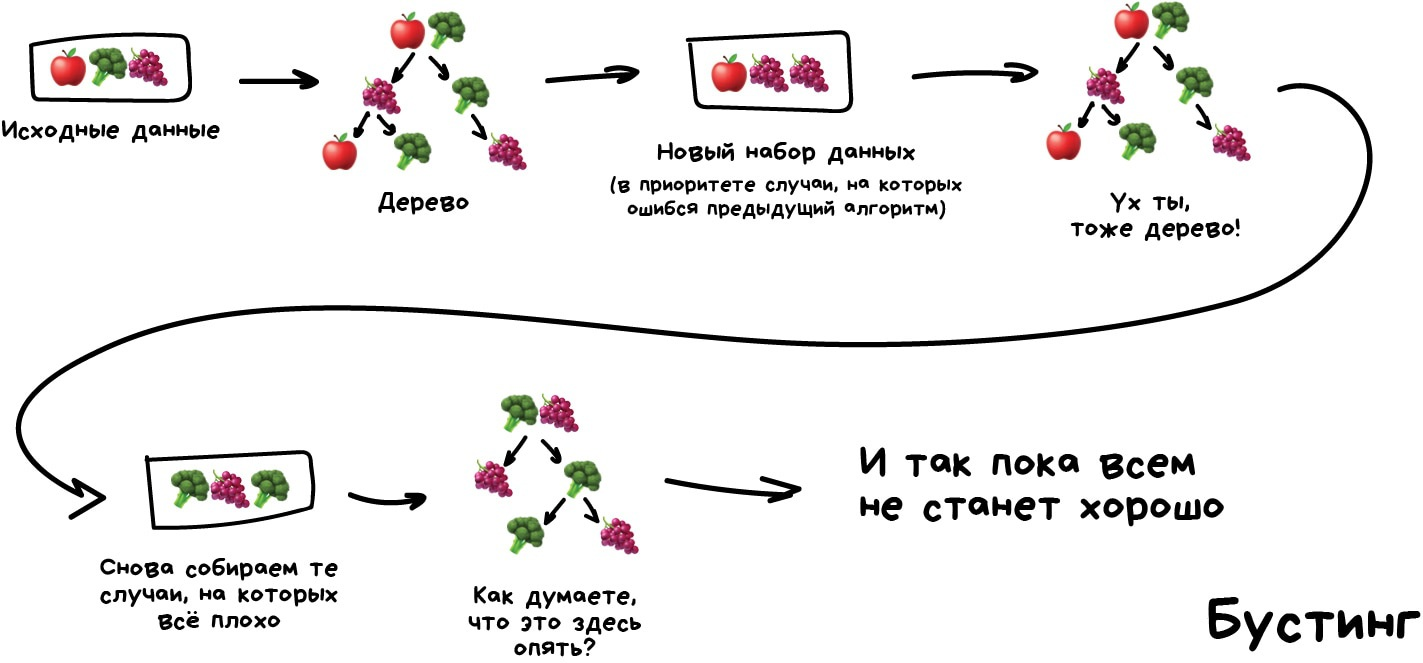


#### **Градиентный спуск**



Ключевой особенностью градиентного бустинга является использование **градиентного спуска** для минимизации функции потерь. Вместо того, чтобы напрямую изменять веса сложных примеров, как в AdaBoost, градиентный бустинг обучает новые модели на остатках (ошибках) предыдущих На каждой итерации вычисляется антиградиент функции потерь, который указывает направление её наискорейшего убывания. Новая модель стремится предсказать этот антиградиент, тем самым компенсируя ошибки ансамбля.

Благодаря такому подходу градиентный бустинг эффективно обучает ансамбли деревьев решений, превосходя по качеству многие другие методы. Он позволяет строить высокоточные нелинейные модели для задач классификации, регрессии и ранжирования, находя сложные закономерности в данных

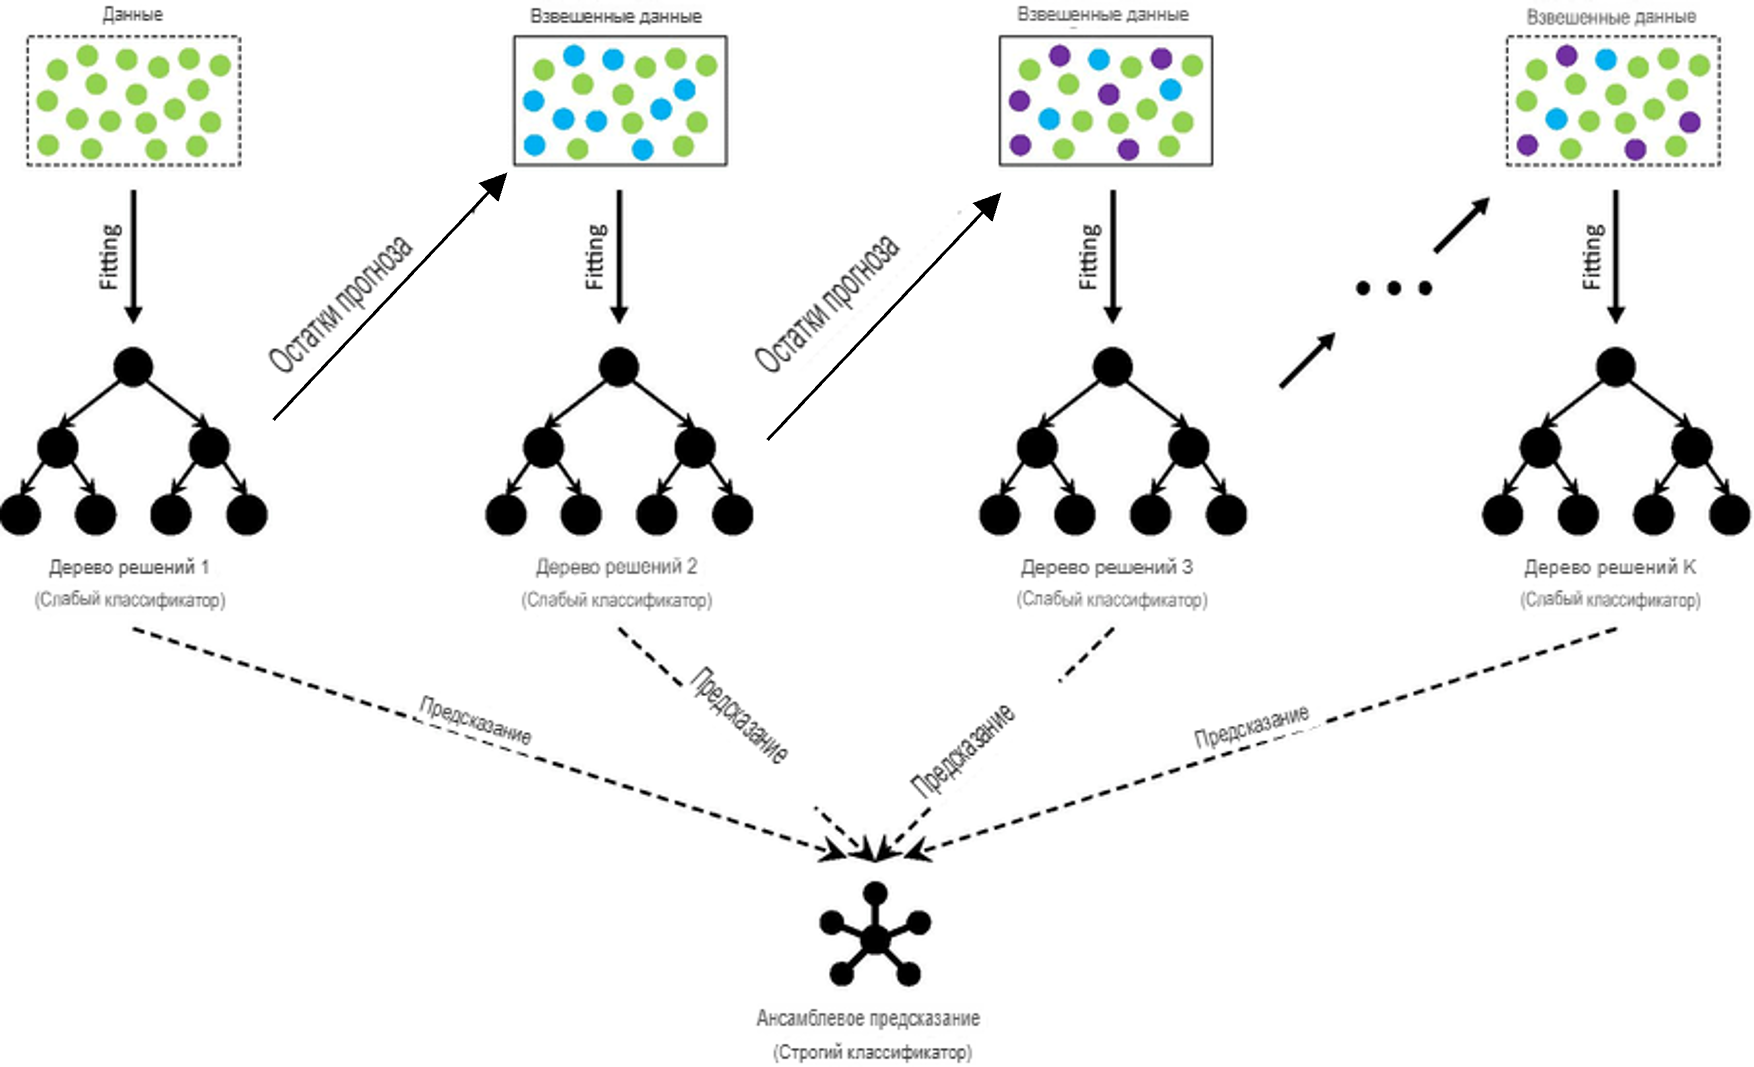

## **Математическое обоснование**

### **Постановка задачи**


Рассмотрим задачу регрессии, где дана обучающая выборка из $N$ примеров:

$\{(x_i, y_i)\}_{i=1}^N$,

где $x_i$ - вектор признаков, $y_i$ - целевая переменная для $i$-го примера.



Цель - построить модель $F(x)$, которая для заданного $x$ будет предсказывать значение $y$, минимизируя некоторую функцию потерь $L(y, F(x))$, усредненную по всей выборке.

### **Алгоритм градиентного бустинга**


Градиентный бустинг строит ансамблевую модель $F_M(x)$ в виде суммы $M$ базовых моделей (чаще всего - деревьев решений):

$F_M(x) = \sum_{m=1}^M f_m(x)$

Модели $f_m(x)$ обучаются последовательно, шаг за шагом приближая ансамбль к оптимуму.

- **Шаг 1.** Инициализируем первое приближение модели константой, минимизирующей функцию потерь:

  $F_0(x) = \arg\min_\gamma \sum_{i=1}^N L(y_i, \gamma)$

- **Шаг 2.** Для каждой итерации $m$ от 1 до $M$:

  - a) Вычисляем *псевдо-остатки* - отрицательный градиент функции потерь для текущей модели $F_{m-1}(x)$:

  $r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)}$

  - б) Обучаем новую базовую модель $f_m(x)$ на выборке $\{(x_i, r_{im})\}_{i=1}^N$, минимизируя среднеквадратичную ошибку.

  - в) Находим оптимальный коэффициент $\gamma_m$ для $f_m(x)$:

   $\gamma_m = \arg\min_\gamma \sum_{i=1}^N L(y_i, F_{m-1}(x_i) + \gamma f_m(x_i))$

  - г) Обновляем ансамбль, добавляя новую модель с коэффициентом $\nu \gamma_m$:

   $F_m(x) = F_{m-1}(x) + \nu \gamma_m f_m(x)$,

   где $\nu$ - скорость обучения (learning rate), $0 < \nu \leq 1$.

- **Шаг 3.** Возвращаем итоговую модель $F_M(x)$.

Ключевые принципы градиентного бустинга:
- Последовательное обучение базовых моделей, каждая из которых приближает ансамбль к оптимуму.
- Использование градиента функции потерь для направления обучения новых моделей.
- Контроль скорости обучения для предотвращения переобучения.

Такой подход позволяет эффективно комбинировать множество относительно простых моделей в единый мощный ансамбль, добиваясь высокого качества предсказаний.

#### **Специфика для классификации**

В классификации предсказание $ F(\mathbf{x}) $ обычно соответствует логарифму отношения шансов (log odds):

$
F(\mathbf{x}) = \log\left( \frac{P(y = 1 \mid \mathbf{x})}{P(y = 0 \mid \mathbf{x})} \right).
$

А вероятность принадлежности классу $ y = 1 $ вычисляется как:

$
P(y = 1 \mid \mathbf{x}) = \frac{1}{1 + e^{-F(\mathbf{x})}}.
$

**Градиент функции потерь** для логистической потери:

$
\frac{\partial L(y_i, F(\mathbf{x}_i))}{\partial F(\mathbf{x}_i)} = - y'_i \frac{2}{1 + e^{2 y'_i F(\mathbf{x}_i)}},
$

где $ y'_i = 2 y_i - 1 $.

**Негативный градиент**:

$
r_{im} = y'_i - \frac{2 y'_i}{1 + e^{2 y'_i F_{m-1}(\mathbf{x}_i)}} = y'_i - \tanh\left(y'_i F_{m-1}(\mathbf{x}_i)\right).
$


### **Реализация алгоритма**

#### **Псевдокод алгоритма**

```plaintext
Инициализировать модель F₀(x)

Для m от 1 до M:
    Вычислить псевдо-ответы r_i:
        r_i = -[∂L(y_i, F(x_i)) / ∂F(x_i)] при F(x) = F₍ₘ₋₁₎(x)
    Обучить базовую модель fₘ(x) на данных (x_i, r_i)
    Найти оптимальный шаг γₘ:
        γₘ = argmin_γ Σ L(y_i, F₍ₘ₋₁₎(x_i) + γ fₘ(x_i))
    Обновить модель:
        Fₘ(x) = F₍ₘ₋₁₎(x) + ν γₘ fₘ(x)
```

#### **Подробности реализации**

- **Выбор функции потерь $ L $:** Для задачи регрессии часто используется среднеквадратичная ошибка (MSE):

  $
  L(y, F(x)) = \frac{1}{2}(y - F(x))^2.
  $

- **Вычисление негативного градиента:**

  Для MSE:

  $
  r_{im} = y_i - F_{m-1}(x_i).
  $

- **Обучение базовой модели:** Обычно используются деревья решений с небольшой глубиной, чтобы избежать переобучения.

- **Шаг обучения $ \nu $:** Малые значения $ \nu $ (например, 0.1) делают обучение более стабильным, но требуют большего числа шагов $ M $.

### **Пример реализации на Python**

Ниже представлен пример реализации градиентного бустинга для задачи регрессии с использованием деревьев решений.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1,
                 max_depth=3, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators        # Число базовых моделей
        self.learning_rate = learning_rate      # Коэффициент скорости обучения ν
        self.max_depth = max_depth              # Максимальная глубина дерева
        self.min_samples_split = min_samples_split  # Минимальное число образцов для разбиения
        self.min_samples_leaf = min_samples_leaf    # Минимальное число образцов в листе
        self.trees = []                         # Список базовых моделей

    def fit(self, X, y):
        # Инициализация начального предсказания средним значением целевой переменной
        self.F0 = np.mean(y)
        self.F = np.full(shape=y.shape, fill_value=self.F0, dtype=np.float64)

        for m in range(self.n_estimators):
            # Вычисление псевдо-ответов (негативный градиент)
            residuals = y - self.F

            # Обучение базового регрессора на псевдо-ответах
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X, residuals)

            # Обновление предсказаний с учетом алгоритма
            update = self.learning_rate * tree.predict(X)
            self.F += update

            # Сохранение текущего дерева
            self.trees.append(tree)

    def predict(self, X):
        # Начальное предсказание
        y_pred = np.full(shape=(X.shape[0],), fill_value=self.F0, dtype=np.float64)

        # Суммирование предсказаний базовых моделей
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

### **Пример использования**

Mean Squared Error: 0.3045


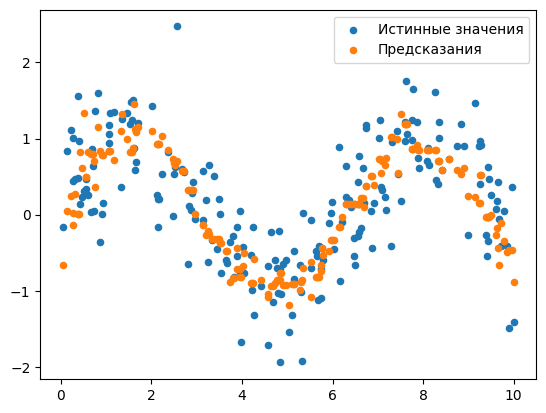

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Генерация синтетических данных
def generate_data(n_samples=1000):
    X = np.linspace(0, 10, n_samples)
    y = np.sin(X) + np.random.normal(0, 0.5, n_samples)
    return X.reshape(-1, 1), y

# Генерируем данные
X, y = generate_data()

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создаем и обучаем модель
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Предсказываем на тестовых данных
y_pred = model.predict(X_test)

# Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Визуализация результатов
plt.scatter(X_test, y_test, s=20, label='Истинные значения')
plt.scatter(X_test, y_pred, s=20, label='Предсказания')
plt.legend()
plt.show()

### **Дополнительные замечания:**

Алгоритмы градиентного бустинга **не ограничены** использованием только деревьев решений в качестве базовых моделей. Тем не менее, на практике именно деревья решений являются наиболее распространенным выбором для базовых моделей в градиентном бустинге. Есть несколько причин, почему деревья решений особенно подходящи для этой задачи:

1. **Универсальность и гибкость**: Деревья решений способны моделировать сложные нелинейные зависимости между признаками и целевой переменной. Они автоматически учитывают взаимодействия между признаками без необходимости их явного задания.

2. **Устойчивость к типам данных**: Деревья решений могут работать с разными типами данных, включая числовые и категориальные признаки. Это делает их универсальным инструментом для работы с разнообразными наборами данных.

3. **Не требуются предварительная обработка данных**: В отличие от многих других моделей, деревья решений не требуют нормализации или стандартизации признаков. Они также могут справляться с пропущенными значениями в данных.

4. **Локальность и интерпретируемость**: Каждое разделение в дереве основано на простых правилах принятия решений (например, $ x_j < c $), что делает модель более интерпретируемой и понятной.

5. **Вычислительная эффективность**: Обучение неглубоких деревьев (столпов) относительно быстро и эффективно по сравнению с более сложными моделями. Это особенно важно в контексте градиентного бустинга, где требуется обучить множество базовых моделей.

6. **Стабильность и способность к обобщению**: Неглубокие деревья с ограниченной глубиной хорошо обобщают данные и менее склонны к переобучению по сравнению с глубокими деревьями.

### **Почему не используются другие модели?**

Хотя теоретически градиентный бустинг может быть применен с любыми дифференцируемыми базовыми моделями, на практике использование других моделей может быть менее эффективным по следующим причинам:

- **Линейные модели**: Они не способны захватывать сложные нелинейные зависимости в данных, что ограничивает их способность улучшать предсказания на каждом шаге бустинга.

- **Нейронные сети**: Хотя они мощные и гибкие, обучение нейронных сетей требует много ресурсов и времени. В контексте градиентного бустинга, где нужно обучать множество базовых моделей, это становится неэффективным.

- **k-ближайших соседей и другие алгоритмы**: Некоторые алгоритмы не подходят для использования в качестве базовых моделей в бустинге из-за их характеристик (например, ненадежность к шуму, высокая вычислительная сложность).

### **Математическое обоснование**

В процессе градиентного бустинга мы стремимся минимизировать функцию потерь путем приближения негативного градиента ошибки на каждом шаге. Деревья решений, особенно **деревья решений с небольшой глубиной** (так называемые "столпы" или "пни"), являются идеальными функциями для приближения произвольных функций, включая негативные градиенты.

Деревья решений разбивают пространство признаков на регионы и присваивают каждому региону постоянное значение. Это позволяет эффективно аппроксимировать сложные функции путем последовательного добавления таких регионов.

### **Преимущества деревьев решений в градиентном бустинге**

- **Способность к точному приближению градиентов**: Деревья решений могут точно моделировать структуру негативного градиента функции потерь, что ускоряет сходимость алгоритма.

- **Обработка выбросов и шума**: Деревья менее чувствительны к выбросам, что повышает устойчивость модели.

- **Сочетание с градиентным бустингом**: При объединении деревьев решений с градиентным бустингом мы получаем мощный ансамбль, который комбинирует слабые, но разнообразные базовые модели для достижения высокой точности.

### **Вывод**

Хотя градиентный бустинг теоретически может использовать любые дифференцируемые базовые модели, на практике деревья решений являются наиболее подходящим выбором из-за их гибкости, эффективности и способности приближать сложные функции. Их особенности идеально сочетаются с идеей градиентного бустинга, позволяя эффективно минимизировать функцию потерь и строить мощные предиктивные модели.

## **Пример бустинга других моделей не на основе деревьев**

Градиентный бустинг обычно ассоциируется с использованием деревьев решений в качестве базовых моделей (weak learners). Однако, в теории, **градиентный бустинг может использовать любые дифференцируемые модели** в качестве базовых алгоритмов. В этом ответе мы рассмотрим пример использования **линейных моделей** в качестве базовых алгоритмов в градиентном бустинге.

### **Градиентный бустинг с моделью линейной регрессии**

Мы реализуем градиентный бустинг для задачи регрессии, используя **линейную регрессию** в качестве базового алгоритма. Для демонстрации создадим синтетические данные с нелинейной зависимостью.

#### Шаг 1: Импорт необходимых библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Шаг 2: Загрузка данных и формирование обучающей выборки

In [ ]:
# Загрузка данных
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Шаг 3: Реализация градиентного бустинга с линейной регрессией

In [ ]:
class GradientBoostingLinearRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators          # Число базовых моделей
        self.learning_rate = learning_rate        # Скорость обучения
        self.models = []                          # Список базовых моделей
        self.initial_prediction = None            # Начальное предсказание

    def fit(self, X, y):
        # Инициализация
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction    # Начальные остатки

        # Обучение базовых моделей
        for i in range(self.n_estimators):
            model = LinearRegression()
            model.fit(X, residual)
            prediction = model.predict(X)
            residual -= self.learning_rate * prediction  # Обновление остатков
            self.models.append(model)

    def predict(self, X):
        # Начальное предсказание
        y_pred = np.full(shape=X.shape[0], fill_value=self.initial_prediction)

        # Суммирование предсказаний базовых моделей
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

#### Шаг 4: Обучение модели и оценка качества

In [ ]:
# Создание и обучение модели
gb_lr = GradientBoostingLinearRegressor(n_estimators=200, learning_rate=0.025)
gb_lr.fit(X_train, y_train)

# Предсказания
y_pred_gb_lr = gb_lr.predict(X_test)

# Оценка качества
mse_gb_lr = mean_squared_error(y_test, y_pred_gb_lr)
print(f"Mean Squared Error (GB Linear Regression): {mse_gb_lr:.4f}")

Mean Squared Error (GB Linear Regression): 0.5554


#### Шаг 5: Сравнение с линейной регрессией

Для сравнения обучим обычную линейную регрессию на тех же данных.

In [ ]:
# Обучение обычной линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Оценка качества
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr:.4f}")

Mean Squared Error (Linear Regression): 0.5559


#### Шаг 6: Визуализация результатов

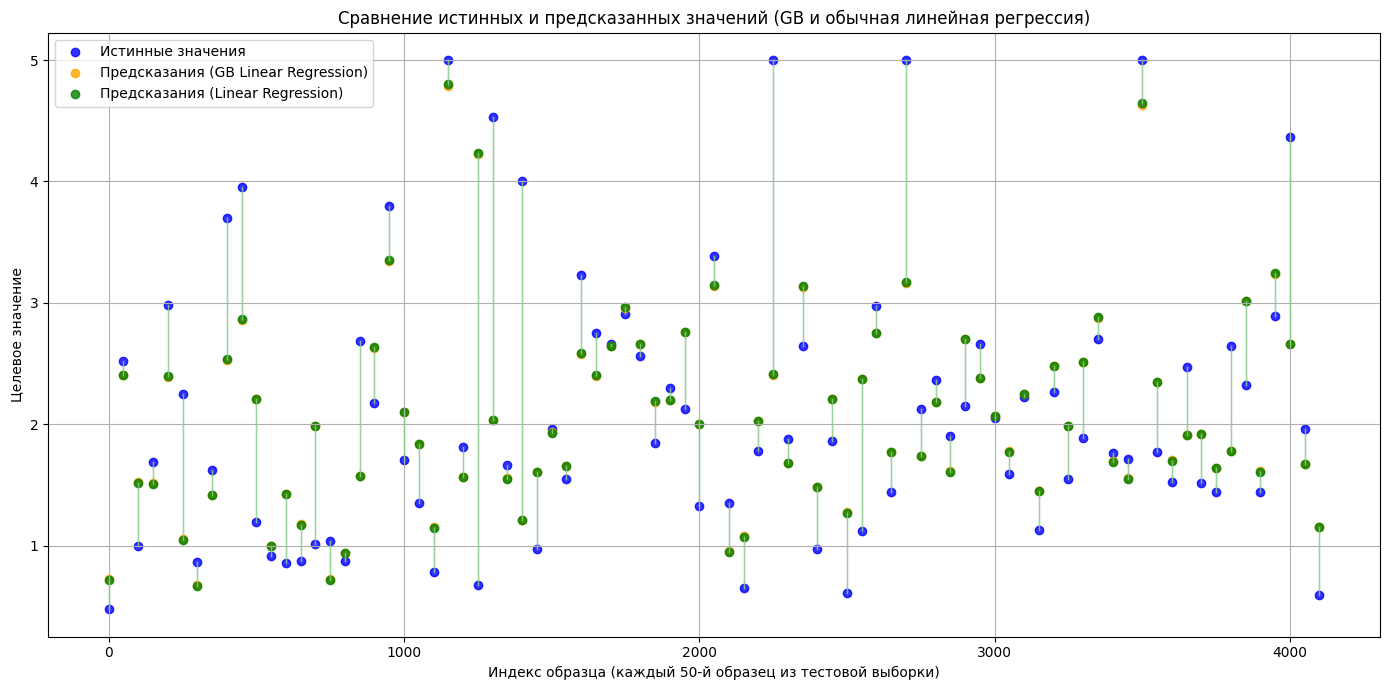

In [ ]:
# Выбор подмножества данных для наглядности
sample_indices = range(0, len(y_test), 50)  # Каждый 50-й образец
y_test_sample = y_test[sample_indices]
y_pred_gb_lr_sample = y_pred_gb_lr[sample_indices]
y_pred_lr_sample = y_pred_lr[sample_indices]
indices = list(sample_indices)

# Построение графика
plt.figure(figsize=(14, 7))

# Отображение истинных значений
plt.scatter(indices, y_test_sample, color='blue', alpha=0.8, label='Истинные значения')

# Отображение предсказанных значений ГБ линейной регрессией
plt.scatter(indices, y_pred_gb_lr_sample, color='orange', alpha=0.8, label='Предсказания (GB Linear Regression)')

# Отображение предсказанных значений обычной линейной регрессии
plt.scatter(indices, y_pred_lr_sample, color='green', alpha=0.8, label='Предсказания (Linear Regression)')

# Линии ошибок для ГБ линейной регрессии
for i in range(len(indices)):
    plt.plot([indices[i], indices[i]], [y_test_sample[i], y_pred_gb_lr_sample[i]], color='gray', linewidth=1, alpha=0.6)

# Линии ошибок для обычной линейной регрессии
for i in range(len(indices)):
    plt.plot([indices[i], indices[i]], [y_test_sample[i], y_pred_lr_sample[i]], color='lightgreen', linewidth=1, alpha=0.6)

plt.xlabel('Индекс образца (каждый 50-й образец из тестовой выборки)')
plt.ylabel('Целевое значение')
plt.title('Сравнение истинных и предсказанных значений (GB и обычная линейная регрессия)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Градиентный бустинг с моделью  kNN**

Для демонстрации универсальности бустинга, рассмотрим также пример с использованием алгоритма **k-ближайших соседей (kNN)** в качестве базовых моделей.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

class GradientBoostingKNNRegressor:
    def __init__(self, n_estimators=50, learning_rate=0.1, n_neighbors=5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.n_neighbors = n_neighbors
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction

        for i in range(self.n_estimators):
            model = KNeighborsRegressor(n_neighbors=self.n_neighbors)
            model.fit(X, residual)
            prediction = model.predict(X)
            residual -= self.learning_rate * prediction
            self.models.append(model)

    def predict(self, X):
        y_pred = np.full(shape=X.shape[0], fill_value=self.initial_prediction)

        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

#### Шаг 1: Обучение и оценка модели

In [ ]:
# Создание и обучение модели
gb_knn = GradientBoostingKNNRegressor(n_estimators=1000, learning_rate=0.1, n_neighbors=5)
gb_knn.fit(X_train_scaled, y_train)

# Предсказания
y_pred_gb_knn = gb_knn.predict(X_test_scaled)

# Оценка качества
mse_gb_knn = mean_squared_error(y_test, y_pred_gb_knn)
print(f"Mean Squared Error (GB KNN): {mse_gb_knn:.4f}")

Mean Squared Error (GB KNN): 0.4012


#### Шаг 2: Сравнение с обычной моделью KNN

In [ ]:
# Обучение обычного KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Оценка качества
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (Simple KNN): {mse_knn:.4f}")

Mean Squared Error (Simple KNN): 0.4324


#### Шаг 3: Визуализация результатов

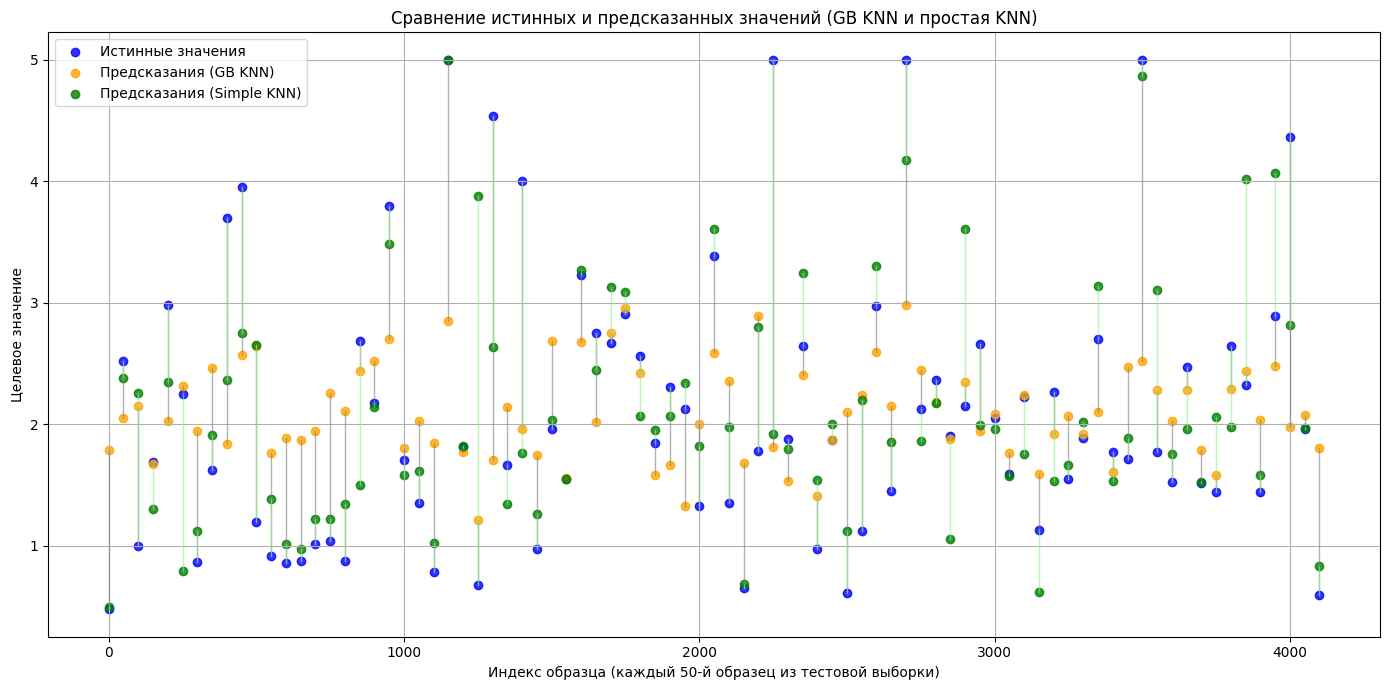

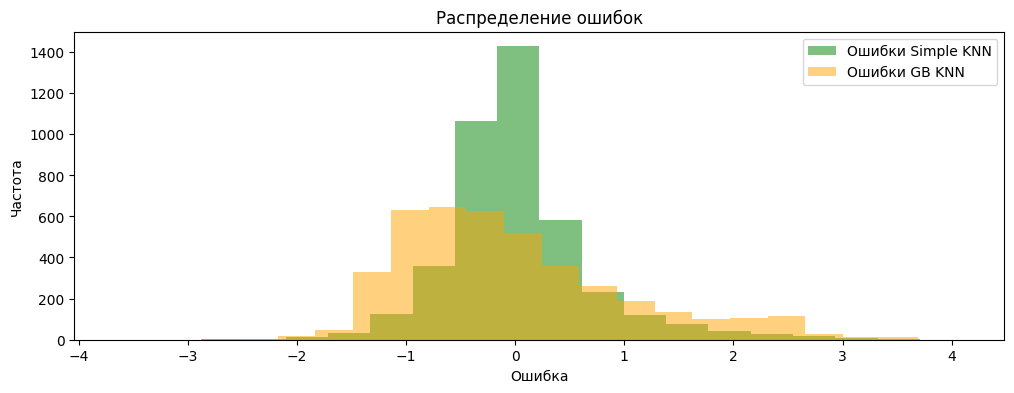

In [ ]:
# Выбор подмножества данных для наглядности
sample_indices = range(0, len(y_test), 50)  # Каждый 50-й образец
y_test_sample = y_test[sample_indices]
y_pred_gb_knn_sample = y_pred_gb_knn[sample_indices]
y_pred_knn_sample = y_pred_knn[sample_indices]
indices = list(sample_indices)

# Построение графика
plt.figure(figsize=(14, 7))

# Отображение истинных значений
plt.scatter(indices, y_test_sample, color='blue', alpha=0.8, label='Истинные значения')

# Отображение предсказанных значений GB KNN
plt.scatter(indices, y_pred_gb_knn_sample, color='orange', alpha=0.8, label='Предсказания (GB KNN)')

# Отображение предсказанных значений простой KNN
plt.scatter(indices, y_pred_knn_sample, color='green', alpha=0.8, label='Предсказания (Simple KNN)')

# Линии ошибок для GB KNN
for i in range(len(indices)):
    plt.plot([indices[i], indices[i]], [y_test_sample[i], y_pred_gb_knn_sample[i]], color='gray', linewidth=1, alpha=0.6)

# Линии ошибок для простой KNN
for i in range(len(indices)):
    plt.plot([indices[i], indices[i]], [y_test_sample[i], y_pred_knn_sample[i]], color='lightgreen', linewidth=1, alpha=0.6)

plt.xlabel('Индекс образца (каждый 50-й образец из тестовой выборки)')
plt.ylabel('Целевое значение')
plt.title('Сравнение истинных и предсказанных значений (GB KNN и простая KNN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Гистограммы ошибок
errors_knn = y_test - y_pred_knn
errors_gb_knn = y_test - y_pred_gb_knn

plt.figure(figsize=(12, 4))
plt.hist(errors_knn, bins=20, alpha=0.5, label='Ошибки Simple KNN', color='green')
plt.hist(errors_gb_knn, bins=20, alpha=0.5, label='Ошибки GB KNN', color='orange')
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.legend()
plt.show()

### **Выводы**

На примерах выше мы убедились, что градиентный бустинг может быть реализован с использованием различных базовых моделей, не ограничиваясь деревьями решений. В примерах были использованы линейная регрессия и метод k-ближайших соседей в качестве базовых алгоритмов.

**Основные выводы:**

- **Универсальность бустинга:** Бустинг является универсальным способом улучшения качества моделей путем комбинирования многих базовых алгоритмов.
- **Приближение нелинейных зависимостей:** Даже линейные модели в составе бустинга могут приближать сложные нелинейные зависимости.
- **Выбор базовых моделей:** Тип базовых моделей влияет на эффективность и сходимость алгоритма. Деревья решений часто предпочтительнее из-за их гибкости, но использование других моделей может быть оправдано в определенных случаях.

**Примечание:** Использование других моделей в качестве базовых алгоритмов в градиентном бустинге может быть оправдано в определенных ситуациях, однако деревья решений остаются наиболее популярным выбором из-за их эффективности и возможности приближать сложные зависимости с относительно небольшим числом базовых моделей.

# **Популярные реализации градиентного бустинга: CatBoost, Light GBM, XGBoost, GradientBoostingClassifier**

Эти алгоритмы завоевали огромную популярность благодаря своей эффективности в широком спектре областей - от задач классификации и регрессии до обнаружения аномалий и рекомендательных систем. На основе систематической оценки их достоинств и недостатков мы рассмотрим ключевые факторы, влияющие на их эффективность, такие как скорость обучения, точность предсказания и устойчивость к переобучению.

## **1. GradientBoostingClassifier (scikit-learn)**

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

**GradientBoostingClassifier** из библиотеки scikit-learn — это реализация базового алгоритма **градиентного бустинга** для задач классификации.

### **Принципы работы GradientBoostingClassifier в scikit-learn**

#### **Основные компоненты**

- **Базовые модели**: По умолчанию используются деревья решений с ограниченной глубиной (обычно слабые модели).
  
- **Функция потерь**: В классификации используется логистическая функция потерь для бинарной классификации и лог-вероятностная функция потерь для многоклассовой классификации.
  
- **Алгоритм обучения**: Реализует алгоритм градиентного бустинга на основе функции потерь, обновляя модель в направлении негативного градиента.

#### **Параметры модели**

- **`n_estimators`**: Количество базовых моделей $ M $.
  
- **`learning_rate`**: Коэффициент скорости обучения $ \nu $, уменьшающий влияние каждой последующей модели:
  
  $
  F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \nu \gamma_m h_m(\mathbf{x}).
  $

- **`max_depth`**, **`max_leaf_nodes`**, **`min_samples_split`**: Параметры, контролирующие сложность базовых деревьев решений.
  
- **`subsample`**: Доля выборки для стохастического градиентного бустинга, помогает предотвратить переобучение.
  
- **`loss`**: Тип функции потери. Для классификации обычно устанавливается `deviance`, что соответствует логистической функции потерь.

#### **Процесс обучения в sklearn**

1. **Инициализация**: Начальное предсказание $ F_0 $ устанавливается в значение, минимизирующее функцию потерь. Для логистической потери это:

   $
   F_0 = \frac{1}{2} \ln\left( \frac{P(y = 1)}{P(y = 0)} \right).
   $

2. **Итеративное обновление**:

   - На каждой итерации вычисляется негативный градиент (псевдо-ответы) на основе текущих предсказаний.
   - Обучается базовое дерево на этом наборе псевдо-ответов.
   - Предсказания обновляются, добавляя предсказания базового дерева с учетом скорости обучения.

3. **Прогнозирование**:

   - Для получения вероятностей используется сигмоидная функция:

     $
     P(y = 1 \mid \mathbf{x}) = \frac{1}{1 + e^{-F_M(\mathbf{x})}}.
     $



### **Пример использования GradientBoostingClassifier**

Ниже приведен пример применения **GradientBoostingClassifier** на задаче классификации с использованием scikit-learn.

#### **Описание параметров модели:**



1. **n_estimators** (int, по умолчанию=100)

   - **Описание**: Количество деревьев (итераций бустинга) в ансамбле.
   - **Советы по использованию**:
     - Увеличение `n_estimators` может улучшить качество модели, но увеличит время обучения и риск переобучения.
     - Часто используется вместе с уменьшением `learning_rate`.
     - Рекомендуется использовать кросс-валидацию для определения оптимального значения.

2. **learning_rate** (float, по умолчанию=0.1)

   - **Описание**: Темп обучения. Определяет, насколько каждый новый дерево влияет на итоговую модель.
   - **Советы по использованию**:
     - Меньшие значения `learning_rate` (например, 0.01) делают модель более устойчивой к переобучению, но требуют большего количества деревьев (`n_estimators`).
     - Компромисс между `learning_rate` и `n_estimators` часто дает лучшие результаты.

3. **max_depth** (int, по умолчанию=3)

   - **Описание**: Максимальная глубина каждого дерева.
   - **Советы по использованию**:
     - Меньшие значения `max_depth` снижают риск переобучения.
     - Значения от 3 до 5 часто являются хорошим выбором.
     - Увеличение глубины позволяет модели улавливать более сложные зависимости, но повышает риск переобучения.

4. **min_samples_split** (int или float, по умолчанию=2)

   - **Описание**: Минимальное количество образцов, необходимых для разделения внутреннего узла.
   - **Советы по использованию**:
     - Увеличение значения помогает предотвратить переобучение на небольших наборах данных.
     - Значения от 2 до 10 подходят для большинства задач.

5. **min_samples_leaf** (int или float, по умолчанию=1)

   - **Описание**: Минимальное количество образцов, необходимых в листовом узле.
   - **Советы по использованию**:
     - Предотвращает появление слишком маленьких листьев.
     - Увеличение значения может улучшить обобщающую способность модели.

6. **max_features** (int, float или string, по умолчанию=None)

   - **Описание**: Количество признаков, рассматриваемых при поиске лучшего разделения.
   - **Возможные значения**:
     - **int**: Точное количество признаков.
     - **float**: Доля признаков.
     - **'auto'** или **'sqrt'**: Использовать корень квадратный из общего числа признаков.
     - **'log2'**: Использовать логарифм общего числа признаков.
     - **None**: Использовать все признаки.
   - **Советы по использованию**:
     - Установка значения меньше общего числа признаков может снизить переобучение и ускорить обучение.
     - Рекомендуется пробовать 'sqrt' или 'log2' для высокоразмерных данных.

7. **subsample** (float, по умолчанию=1.0)

   - **Описание**: Доля выборки, использованная для обучения каждого базового оценщика.
   - **Советы по использованию**:
     - Значения меньше 1.0 вводят случайность и могут снизить переобучение.
     - Типичные значения: 0.5-1.0.
     - Значение 0.8 часто используется для уменьшения дисперсии модели.

8. **loss** (string, по умолчанию='log_loss')

   - **Описание**: Функция потерь для оптимизации.
   - **Возможные значения**:
     - **'log_loss'**: Логистическая потеря, подходящая для бинарной классификации.
     - **'deviance'**: Синоним 'log_loss'.
     - **'exponential'**: Адактивная экспоненциальная потеря, аналогична AdaBoost.
   - **Советы по использованию**:
     - Для большинства задач бинарной классификации рекомендуется 'log_loss'.
     - 'exponential' может быть чувствительна к шуму и выбросам.

9. **criterion** (string, по умолчанию='friedman_mse')

   - **Описание**: Функция для измерения качества разбиения.
   - **Возможные значения**:
     - **'friedman_mse'**: Функция Фридмана по уменьшению дисперсии.
     - **'squared_error'**: Среднеквадратичная ошибка.
     - **'mse'**: Синоним 'squared_error'.
   - **Советы по использованию**:
     - 'friedman_mse' обычно показывает лучшие результаты и является рекомендуемым вариантом.

10. **random_state** (int, RandomState instance или None, по умолчанию=None)

    - **Описание**: Управляет генерацией случайных чисел для воспроизводимости результатов.
    - **Советы по использованию**:
      - Установите конкретное значение (например, 42) для воспроизводимости экспериментов.

11. **min_weight_fraction_leaf** (float, по умолчанию=0.0)

    - **Описание**: Минимальная взвешенная фракция суммы весов всех образцов, необходимая в листовом узле.
    - **Советы по использованию**:
      - Обычно не требуется изменять этот параметр.
      - Используется для учета весов при построении дерева.

12. **max_leaf_nodes** (int или None, по умолчанию=None)

    - **Описание**: Ограничивает число листовых узлов дерева.
    - **Советы по использованию**:
      - Установка этого параметра может сократить время обучения.
      - Значения должны быть больше 2.

13. **validation_fraction** (float, по умолчанию=0.1)

    - **Описание**: Доля данных для ранней остановки при использовании `n_iter_no_change`.
    - **Советы по использованию**:
      - Применяется, если указана ранняя остановка обучения.
      - Типичное значение 0.1 (10% данных для валидации).

14. **n_iter_no_change** (int или None, по умолчанию=None)

    - **Описание**: Используется для ранней остановки. Обучение прекращается, если в течение заданного числа итераций метрика не улучшается.
    - **Советы по использованию**:
      - Помогает предотвратить переобучение.
      - Установите положительное целое число, чтобы включить раннюю остановку.

15. **tol** (float, по умолчанию=1e-4)

    - **Описание**: Порог для определения улучшения метрики при ранней остановке.
    - **Советы по использованию**:
      - Меньшие значения делают критерий остановки более строгим.
      - Обычно оставляют значение по умолчанию.







#### **Советы по использованию параметров:**



- **Борьба с переобучением**:
  - Уменьшайте `max_depth` и `n_estimators`.
  - Увеличивайте `min_samples_leaf` и `min_samples_split`.
  - Уменьшайте `learning_rate` и используйте большее количество `n_estimators`.

- **Ускорение обучения**:
  - Уменьшайте `n_estimators`.
  - Устанавливайте `max_features` или `subsample` меньше 1.0.
  - Используйте параметр `max_leaf_nodes` для ограничения размера деревьев.

- **Баланс между смещением и дисперсией**:
  - Высокое смещение может возникать при слишком простой модели (маленькая глубина деревьев).
  - Высокая дисперсия может возникать при слишком сложной модели (большая глубина деревьев, большое количество деревьев).
  - Найдите оптимальный баланс, экспериментируя с `max_depth`, `n_estimators` и `learning_rate`.

- **Комбинация `learning_rate` и `n_estimators`**:
  - Маленький `learning_rate` требует большего числа `n_estimators`.
  - Начните с `learning_rate=0.1` и настройте в сочетании с `n_estimators`.

- **Использование кросс-валидации**:
  - Применяйте кросс-валидацию для подбора параметров и оценки обобщающей способности модели.

- **Ранняя остановка**:
  - Используйте `n_iter_no_change` и `validation_fraction` для автоматической остановки обучения при отсутствии улучшений.
  - Помогает сэкономить время и предотвратить переобучение.

#### **Код:**

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                 max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = gbc.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.9561


**GradientBoostingClassifier** — эффективный инструмент для задач классификации, объединяющий гибкость и точность. Понимание его математического обоснования и принципов работы позволяет эффективно применять его на практике и настраивать для различных задач.

## **2. XGBoost (eXtreme Gradient Boosting)**

**XGBoost** (eXtreme Gradient Boosting) — это библиотека машинного обучения с открытым исходным кодом, которая реализует эффективный и масштабируемый алгоритм градиентного бустинга дерева решений. XGBoost стал одним из наиболее популярных инструментов для решения задач классификации и регрессии благодаря своей высокой производительности и гибкости.

### **Особенности XGBoost**

**XGBoost** расширяет стандартный градиентный бустинг следующими ключевыми особенностями:

1. **Регуляризация**: Добавляет термы регуляризации для контроля сложности модели, что помогает избежать переобучения.
   
2. **Точное вычисление**: Использует вторые производные (Гессиан) для оптимизации, что ускоряет сходимость.
   
3. **Параллельное и распределенное вычисление**: Оптимизирован для быстрого обучения на больших данных.
   
4. **Обработка пропущенных значений**: Умеет эффективно работать с пропущенными значениями в данных.


### **Математическое обоснование XGBoost**

#### **Целевая функция**

XGBoost минимизирует следующую **обобщенную целевую функцию** с учетом регуляризации:

$
\text{Obj} = \sum_{i=1}^N L(y_i, \hat{y}_i^{(t)}) + \sum_{m=1}^t \Omega(f_m),
$

где:

- $ L $ — дифференцируемая функция потерь,
- $ \hat{y}_i^{(t)} $ — предсказание на итерации $ t $,
- $ \Omega(f) $ — терм регуляризации базовой модели $ f $.

Терм регуляризации определяется как:

$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \| \mathbf{w} \|^2,
$

где:

- $ T $ — число листьев в дереве $ f $,
- $ \gamma $ и $ \lambda $ — гиперпараметры регуляризации,
- $ \mathbf{w} $ — вектор весов листьев дерева.

#### **Вывод обновления модели**

На итерации $ t $ мы добавляем новое дерево $ f_t $ к модели:

$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + f_t(\mathbf{x}_i).
$

Целевая функция становится:

$
\text{Obj}^{(t)} = \sum_{i=1}^N L(y_i, \hat{y}_i^{(t-1)} + f_t(\mathbf{x}_i)) + \Omega(f_t).
$

Поскольку точное минимизирование этой функции сложно, мы используем второе приближение Тейлора для функции потерь вокруг текущего предсказания $ \hat{y}_i^{(t-1)} $:

$
L(y_i, \hat{y}_i^{(t)}) \approx L(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(\mathbf{x}_i) + \frac{1}{2} h_i [f_t(\mathbf{x}_i)]^2,
$

где:

- $ g_i = \left[ \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} \right]_{\hat{y}_i^{(t-1)}} $ — первая производная (градиент),
- $ h_i = \left[ \frac{\partial^2 L(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} \right]_{\hat{y}_i^{(t-1)}} $ — вторая производная (Гессиан).

Подставляя это в целевую функцию, получаем приближенное выражение:

$
\text{Obj}^{(t)} \approx \sum_{i=1}^N \left[ g_i f_t(\mathbf{x}_i) + \frac{1}{2} h_i [f_t(\mathbf{x}_i)]^2 \right] + \Omega(f_t) + \text{const},
$

где "const" — константа, не зависящая от $ f_t $ и поэтому не влияющая на оптимизацию.

#### **Оптимизация структуры дерева**

Цель — найти такое дерево $ f_t $, которое минимизирует приближенный функционал:

$
\tilde{\text{Obj}}^{(t)} = \sum_{i=1}^N \left[ g_i f_t(\mathbf{x}_i) + \frac{1}{2} h_i [f_t(\mathbf{x}_i)]^2 \right] + \Omega(f_t).
$

Дерево представляет собой разбиение данных на листья, каждому листу соответствует значение веса $ w_j $. Обозначим $ q(\mathbf{x}) $ — функция назначения объекта $ \mathbf{x} $ в лист дерева, $ q: \mathbf{x} \rightarrow \{1, 2, ..., T\} $.

Тогда $ f_t(\mathbf{x}) = w_{q(\mathbf{x})} $, и можно переписать функцию в терминах листьев:

$
\tilde{\text{Obj}}^{(t)} = \sum_{j=1}^T \left[ G_j w_j + \frac{1}{2} H_j w_j^2 \right] + \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2,
$

где:

- $ G_j = \sum_{i \in I_j} g_i $,
- $ H_j = \sum_{i \in I_j} h_i $,
- $ I_j = \{ i \mid q(\mathbf{x}_i) = j \} $ — множество объектов в листе $ j $.

Объединяя термы, получаем:

$
\tilde{\text{Obj}}^{(t)} = \sum_{j=1}^T \left[ G_j w_j + \left( \frac{1}{2} H_j + \frac{1}{2} \lambda \right) w_j^2 \right] + \gamma T.
$

#### **Вычисление оптимальных весов и оценки качества разбиения**

Для минимизации по весам $ w_j $ фиксируем структуру дерева и находим оптимальные значения весов, вычисляя производную по $ w_j $ и приравнивая ее нулю:

$
\frac{\partial \tilde{\text{Obj}}^{(t)}}{\partial w_j} = G_j + \left( H_j + \lambda \right) w_j = 0.
$

Отсюда оптимальное значение $ w_j^* $:

$
w_j^* = -\frac{G_j}{H_j + \lambda}.
$

Подставив обратно, получаем оптимальное значение целевой функции для данного дерева:

$
\tilde{\text{Obj}}^{(t)} = -\frac{1}{2} \sum_{j=1}^T \frac{G_j^2}{H_j + \lambda} + \gamma T.
$

#### **Критерий разделения (Gain)**

Чтобы оценить, стоит ли делать разбиение в узле дерева, вычисляется **прирост информации (качества)** (gain):

$
\text{Gain} = \frac{1}{2} \left( \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right) - \gamma,
$

где:

- $ G_L, H_L $ — суммы градиентов и гессианов в левом подузле,
- $ G_R, H_R $ — в правом подузле.

Разбиение выполняется, если $ \text{Gain} > 0 $.

---

### **Простое объяснение принципов работы XGBoost**

#### **Основные принципы**

1. **Последовательное обучение**: XGBoost строит деревья последовательно, каждый раз обучаясь на ошибках предыдущих деревьев.

2. **Использование градиентов**: Вместо того чтобы просто смотреть на ошибки, XGBoost использует градиенты функции потерь (направление и величину ошибки) для обучения новых деревьев.

3. **Регуляризация**: Добавление штрафов за сложность модели (например, за количество листьев в дереве) помогает избежать переобучения.

4. **Точное вычисление**: XGBoost использует как первые, так и вторые производные функции потерь для более точной оптимизации.

5. **Эффективность**: Алгоритм оптимизирован для высокоскоростного обучения, включая параллельную обработку и эффективное использование памяти.

#### **Последовательность действий:**

1. **Инициализация**: Алгоритм начинает с начального предсказания (например, среднего значения целевой переменной).

2. **Вычисление градиентов и гессианов**: Для каждого объекта вычисляются градиент и гессиан функции потерь, которые показывают, насколько и в каком направлении нужно скорректировать предсказание.

3. **Строительство нового дерева**: Используя градиенты и гессианы, алгоритм строит новое дерево, которое пытается скорректировать ошибки предыдущего предсказания.

4. **Обновление предсказаний**: Предсказания обновляются с учетом новых корректировок.

5. **Повторение**: Процесс повторяется, добавляя новые деревья, пока не будет достигнуто заданное количество итераций или не произойдет сходимость.

### **Пример применения XGBoost**

Ниже приведен пример использования XGBoost для задачи классификации.

####**Описание параметров модели:**


- **objective** (string или callable, по умолчанию='binary:logistic'): Функция потерь, которая будет оптимизироваться. Для задач бинарной классификации используется 'binary:logistic', для многоклассовой классификации — 'multi:softmax' или 'multi:softprob'.

    - *'binary:logistic'*: для бинарной классификации, возвращает вероятности классов.
    - *'binary:logitraw'*: для бинарной классификации, возвращает неотсчетные прогнозы.
    - *'multi:softmax'*: для многоклассовой классификации с прогнозом метки класса (требует указать параметр `num_class`).
    - *'multi:softprob'*: для многоклассовой классификации, возвращает вероятности классов (требует параметр `num_class`).

- **eval_metric** (string, list или callable, по умолчанию=None): Метрика оценки качества модели при обучении. Если не указана, выбирается по умолчанию в зависимости от `objective`.

    - *'logloss'*: логистическая функция потерь для задач классификации.
    - *'error'*: доля неправильных прогнозов (1 - accuracy).
    - *'auc'*: площадь под ROC-кривой.

- **eta** (alias **learning_rate**) (float, по умолчанию=0.3): Темп обучения. Определяет шаг обновления весов при каждой итерации. Меньшее значение требует большего количества деревьев для достижения хорошей производительности, но может улучшить обобщающую способность модели.

- **max_depth** (int, по умолчанию=6): Максимальная глубина дерева. Увеличение значения позволяет модели выучить более сложные зависимости, но слишком большие значения могут привести к переобучению.

- **subsample** (float, по умолчанию=1): Доля выборки, используемая при построении каждого дерева. Значение от 0 до 1.

- **colsample_bytree** (float, по умолчанию=1): Доля признаков (фичей), случайным образом выбираемых для построения каждого дерева.

- **gamma** (float, по умолчанию=0): Минимальное сокращение потерь, необходимое для дальнейшего разбиения узла дерева. Большее значение делает модель более консервативной.

- **min_child_weight** (float, по умолчанию=1): Минимальная сумма весов наблюдений (hessian) в листе. Используется для управления переобучением. Большее значение делает модель более консервативной.

- **reg_alpha** (alias **alpha**) (float, по умолчанию=0): Коэффициент L1-регуляризации на веса признаков. Помогает в борьбе с переобучением путем обнуления некоторых весов.

- **reg_lambda** (alias **lambda**) (float, по умолчанию=1): Коэффициент L2-регуляризации на веса признаков. Помогает в борьбе с переобучением путем уменьшения величины весов.

- **scale_pos_weight** (float, по умолчанию=1): Используется для несбалансированных данных классификации. Если положительный класс встречается реже, можно установить значение `scale_pos_weight > 1` для компенсации.

- **n_estimators** (int, по умолчанию=100): Количество деревьев в модели. Большее количество может улучшить производительность, но увеличивает время обучения.

- **verbosity** (int, по умолчанию=1): Управляет уровнем детализации логирования.

    - *0*: тихий режим (без вывода сообщений).
    - *1*: выводится только информация об ошибках.
    - *2*: предупреждения.
    - *3*: информационные сообщения.

- **n_jobs** (int, по умолчанию=1): Количество потоков для параллельного обучения. Значение -1 использует все доступные ядра.

- **gpu_id** (int, по умолчанию=-1): Идентификатор GPU для использования при параллельном обучении на GPU.

- **tree_method** (string, по умолчанию='auto'): Алгоритм построения деревьев.

    - *'auto'*: выбирает метод автоматически.
    - *'exact'*: точный жадный алгоритм.
    - *'approx'*: приближенный алгоритм, используемый при больших наборах данных.
    - *'hist'*: быстрая гистограммная обработка.
    - *'gpu_hist'*: быстрая гистограммная обработка на GPU.

- **early_stopping_rounds** (int, по умолчанию=None): Используется для ранней остановки обучения, если оценка на валидационном наборе не улучшается заданное число раундов.

#### **Код:**

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание DMatrix — оптимизированного объекта данных для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Параметры модели
params = {
    'objective': 'binary:logistic',  # Задача бинарной классификации
    'eval_metric': 'logloss',        # Функция потерь
    'eta': 0.1,                      # Коэффициент обучения
    'max_depth': 3                   # Максимальная глубина дерева
}

# Обучение модели
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# Предсказание на тестовых данных
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели XGBoost: {accuracy:.4f}")

Точность модели XGBoost: 0.9561


**XGBoost** является эффективным инструментом для решения задач классификации и регрессии благодаря своей эффективности, гибкости и высокой точности. Он расширяет стандартный градиентный бустинг, добавляя регуляризацию, использование вторых производных и оптимизации для высокопроизводительного обучения.

Основные аспекты, которые делают XGBoost особенным:

- **Математическая строгость**: Использование второго порядка приближения функции потерь для более точной оптимизации.

- **Регуляризация**: Контроль за переобучением через регуляризационные термы.

- **Эффективность вычислений**: Оптимизации для быстрого и масштабируемого обучения.

Понимание математических основ XGBoost позволяет лучше настраивать модель и осознанно применять ее к различным задачам, добиваясь наилучших результатов.

**Общие рекомендации по настройке параметров XGBoost:**

- При наличии переобучения можно уменьшить `max_depth`, `eta` и увеличить `reg_alpha` или `reg_lambda`.

- Если модель недообучается, попробуйте увеличить `n_estimators`, `max_depth` или уменьшить регуляризационные параметры.

- Для ускорения обучения на больших данных используйте `tree_method='hist'` или `tree_method='gpu_hist'` при наличии GPU.

- Всегда фиксируйте `random_state` для воспроизводимости результатов.

**Использование параметров для многоклассовой классификации:**

Если вы решаете задачу многоклассовой классификации, вам нужно установить `objective='multi:softmax'` или `objective='multi:softprob'` и указать параметр `num_class`, равный количеству классов.

## **3. LightGBM (Light Gradient Boosting Machine)**

Документация: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

**LightGBM** (Light Gradient Boosting Machine) — это высокопроизводительная библиотека машинного обучения с открытым исходным кодом, разработанная компанией Microsoft. Она реализует алгоритм градиентного бустинга решающих деревьев (GBDT) и оптимизирована для высокой скорости и эффективности обучения, а также для низкого потребления памяти.

Основные причины популярности LightGBM:

- **Высокая скорость обучения** и предсказания.
- **Низкое потребление памяти**.
- **Высокая точность** предсказаний.
- **Масштабируемость** на большие наборы данных.
- **Поддержка параллелизма** и алгоритмов распределенного обучения.

Дополнительно: https://habr.com/ru/companies/skillfactory/articles/530594/

### **Особенности LightGBM:**

LightGBM предлагает несколько инноваций по сравнению с классическими реализациями GBDT, что делает его более быстрым и эффективным.

#### **1. Способ роста деревьев: Leaf-wise Growth**

В традиционных реализациях деревья строятся по принципу **Level-wise Growth**, где на каждой итерации все узлы на текущем уровне разделяются, и дерево растет в ширину.

**LightGBM** использует **Leaf-wise Growth**, где на каждом шаге выбирается и разделяется лист с наибольшим потенциалом улучшения функции потерь (наибольший прирост информации). Это позволяет уменьшить значение функции потерь более эффективно, но при этом может приводить к более глубоким и несбалансированным деревьям.

##### **Математическое обоснование**

- **Прирост информации (Gain)** при разбиении узла рассчитывается как уменьшение функции потерь, связанное с этим разбиением.
- На каждой итерации выбирается лист с максимальным значением $ \text{Gain} $ для разбиения.

#### **2. Gradient-based One-Side Sampling (GOSS)**

При обучении на больших данных вычисление градиентов для всех объектов может быть ресурсоемким. **GOSS** предлагает отобрать более информативные объекты для обучения на основе величины их градиентов.

##### **Идея GOSS**

- Объекты с большими абсолютными значениями градиентов несут больше информации о функции потерь и требуют большей внимания.
- GOSS сохраняет все объекты с большими градиентами и случайно выбирает объекты с малыми градиентами.
- Вес выбранных объектов с малыми градиентами корректируется, чтобы компенсировать изменение распределения данных.

##### **Математическое описание**

1. **Выбор объектов**:

   - Пусть $ a $ — доля сохраняемых объектов с большими градиентами.
   - Пусть $ b $ — доля случайно выбранных объектов с малыми градиентами.

2. **Коррекция весов**:

   - Для объектов с малыми градиентами веса умножаются на $ \frac{1 - a}{b} $ для сохранения без смещения оценки градиента функции потерь.

#### **3. Exclusive Feature Bundling (EFB)**

При большом количестве признаков время обучения и объем памяти могут быть проблемой. **EFB** объединяет разреженные и взаимно исключающие признаки в один признак, уменьшая таким образом размерность задачи.

##### **Идея EFB**

- **Взаимно исключающие признаки**: Признаки, которые никогда не принимают ненулевые значения одновременно для одного объекта.
- **Объединение признаков**: Такие признаки могут быть объединены в один, поскольку они не пересекаются по своим ненулевым значениям.

##### **Математическое обоснование**

- Пусть $ \mathbf{x}_i $ — вектор признаков для объекта $ i $.
- Признаки $ x_{ij} $ и $ x_{ik} $ являются взаимно исключающими, если $ x_{ij} \cdot x_{ik} = 0 $ для всех $ i $.
- Вместо отдельных признаков создается объединенный признак $ x_{i, \text{bundle}} $, который объединяет значения нескольких взаимно исключающих признаков.

#### **4. Histogram-based Decision Tree**

LightGBM использует гистограммный алгоритм для построения деревьев, что ускоряет поиск оптимальных порогов разделения признаков.

##### Идея

- **Бининговые признаки**: Значения признаков дискретизируются в небольшое количество бинов (коробок).
- **Построение гистограмм**: Для каждого признака вычисляется гистограмма частот.
- **Поиск разделений**: Оптимальные пороги разделения выбираются среди границ бинов.

##### **Математическое обоснование**

- Для каждого признака создается гистограмма с $ K $ бинами.
- Значения признака $ x_{ij} $ заменяются на индексы соответствующих им бинов $ b_{ij} \in \{1, 2, ..., K\} $.
- Поиск лучшего разделения выполняется путем перебора $ K - 1 $ возможных порогов.

### **Математический аппарат процесса обучения в LightGBM**

#### **Целевая функция**

LightGBM минимизирует следующую обобщенную целевую функцию:

$
\text{Obj} = \sum_{i=1}^N l(y_i, \hat{y}_i^{(t)}) + \sum_{m=1}^t \Omega(f_m),
$

где:

- $ l(y_i, \hat{y}_i^{(t)}) $ — функция потерь для объекта $ i $ на итерации $ t $.
- $ \Omega(f) $ — регуляризационный терм для дерева $ f $, обычно включающий штрафы за количество листьев и величину весов листьев.

#### **Разложение функции потерь**

Используя второе разложение Тейлора для аппроксимации функции потерь:

$
l(y_i, \hat{y}_i^{(t)}) \approx l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(\mathbf{x}_i) + \frac{1}{2} h_i [f_t(\mathbf{x}_i)]^2,
$

где:

- $ g_i = \left[ \frac{\partial l(y_i, \hat{y}_i)}{\partial \hat{y}_i} \right]_{\hat{y}_i^{(t-1)}} $ — градиент.
- $ h_i = \left[ \frac{\partial^2 l(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} \right]_{\hat{y}_i^{(t-1)}} $ — гессиан (вторая производная).

#### **Оптимизация разбиений**

Для каждого возможного разбиения вычисляется прирост качества ($ \text{Gain} $):

$
\text{Gain} = \frac{1}{2} \left( \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right) - \gamma,
$

где:

- $ G_L, H_L $ — сумма градиентов и гессианов в левом подузле.
- $ G_R, H_R $ — в правом подузле.
- $ \lambda $ — параметр регуляризации.
- $ \gamma $ — штраф за рост дерева (например, за новые листья).

#### **Выбор лучшего разбиения**

- Для каждого признака и возможного порога (из бинов) вычисляется $ \text{Gain} $.
- Выбирается разбиение с максимальным $ \text{Gain} $, превышающим минимальный порог.

#### **Обновление предсказаний**

После построения дерева и определения весов листьев ($ w_j $) предсказания обновляются:

$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + f_t(\mathbf{x}_i) = \hat{y}_i^{(t-1)} + w_{q(\mathbf{x}_i)},
$

где $ q(\mathbf{x}_i) $ определяет лист дерева, в который попадает объект $ i $.

### **Общие принципы функционирования LightGBM:**

#### **1. Быстрое обучение и предсказание**

LightGBM использует специальные техники для ускорения обучения:

- **GOSS**: Отбирает наиболее значимые объекты для обучения, что позволяет сократить объем вычислений без существенной потери точности.
- **EFB**: Объединяет взаимно исключающие признаки, сокращая размерность и ускоряя обучение.
- **Гистограммный алгоритм**: Использует дискретизацию признаков для быстрого поиска оптимальных разбиений.

#### **2. Эффективное использование ресурсов**

- **Память**: За счет уменьшения размера признаков и отбора объектов LightGBM потребляет меньше памяти.
- **Параллелизм**: Алгоритм поддерживает многопоточность, ускоряя обучение на многоядерных процессорах.

#### **3. Высокая точность**

- **Leaf-wise Growth**: Развитие деревьев по наибольшему приросту позволяет более точно моделировать сложные зависимости.
- **Регуляризация**: Встроенные механизмы регуляризации помогают избежать переобучения и улучшить обобщающую способность модели.

#### **4. Масштабируемость**

LightGBM способен эффективно обучаться на больших данных благодаря своим оптимизациям и поддержке распределенного обучения.

### **Пример использования LightGBM**

#### **Описание параметров модели:**



1. **n_estimators** (int, по умолчанию=100)

   - **Описание**: Количество бустинговых итераций, то есть количество деревьев в модели.
   - **Рекомендации**: Увеличение значения может улучшить качество модели, но увеличит время обучения и риск переобучения. Часто используется вместе с параметром `learning_rate`; при уменьшении `learning_rate` обычно увеличивают `n_estimators`.

2. **learning_rate** (float, по умолчанию=0.1)

   - **Описание**: Темп обучения, также известный как коэффициент сжатия. Определяет, насколько сильно каждый базовый обучающий влияет на итоговую модель.
   - **Рекомендации**: Меньшие значения (например, 0.01) могут улучшить обобщающую способность модели, но требуют большего количества деревьев. Начните с 0.1 и при необходимости уменьшайте.

3. **max_depth** (int, по умолчанию=-1)

   - **Описание**: Максимальная глубина дерева. Значение -1 означает отсутствие ограничения.
   - **Рекомендации**: Ограничение глубины предотвращает переобучение. Типичные значения — от 3 до 10. Чем меньше значение, тем более обобщающей будет модель.

4. **num_leaves** (int, по умолчанию=31)

   - **Описание**: Максимальное количество листьев в одном дереве.
   - **Рекомендации**: Один из наиболее важных параметров. Увеличение `num_leaves` повышает сложность модели и может привести к переобучению. Обычно `num_leaves` должно быть меньше или равно \(2^{\text{max\_depth}}\).

5. **min_child_samples** (int, по умолчанию=20)

   - **Описание**: Минимальное количество данных в одном листе.
   - **Рекомендации**: Увеличение значения предотвращает переобучение, особенно на небольших выборках. Если модель недообучается, можно уменьшить это значение.

6. **subsample** (float, по умолчанию=1.0)

   - **Описание**: Доля выборки для построения каждого дерева (метод баггинга).
   - **Рекомендации**: Значения меньше 1.0 вводят случайность и помогают избежать переобучения. Типичные значения — от 0.5 до 1.0.

7. **colsample_bytree** (float, по умолчанию=1.0)

   - **Описание**: Доля признаков, используемых при построении каждого дерева (метод выбора признаков).
   - **Рекомендации**: Значения меньше 1.0 снижают корреляцию между деревьями и уменьшают переобучение. Типичные значения — от 0.5 до 1.0.

8. **reg_alpha** (float, по умолчанию=0.0)

   - **Описание**: Коэффициент L1-регуляризации.
   - **Рекомендации**: Помогает в борьбе с переобучением путем разреживания весов. Хорошо работает при наличии большого количества признаков.

9. **reg_lambda** (float, по умолчанию=0.0)

   - **Описание**: Коэффициент L2-регуляризации.
   - **Рекомендации**: Помогает в борьбе с переобучением путем уменьшения абсолютных значений весов. Можно пробовать значения от 0 до 1.

10. **objective** (string, по умолчанию=None)

    - **Описание**: Функция потерь, которую оптимизирует модель. Для задач классификации возможны, например, 'binary' для бинарной классификации или 'multiclass' для многоклассовой.
    - **Рекомендации**: Убедитесь, что функция потерь соответствует вашей задаче. Например, для бинарной классификации используйте 'binary'.

11. **class_weight** (dict, 'balanced', или None, по умолчанию=None)

    - **Описание**: Вес классов для обработки несбалансированных данных. Если 'balanced', веса будут автоматически рассчитаны как обратнопропорциональные частотам классов.
    - **Рекомендации**: При значительном дисбалансе классов используйте 'balanced' или задайте веса вручную.

12. **random_state** (int или None, по умолчанию=None)

    - **Описание**: Управляет генератором случайных чисел для воспроизводимости результатов.
    - **Рекомендации**: Установите конкретное значение (например, 42) для воспроизводимости.

13. **n_jobs** (int, по умолчанию=-1)

    - **Описание**: Количество параллельных потоков для обучения. -1 означает использование всех доступных ядер.
    - **Рекомендации**: Используйте -1, чтобы ускорить обучение.

14. **importance_type** (string, по умолчанию='split')

    - **Описание**: Тип важности признаков: 'split' — количество разбиений по признаку, 'gain' — информация, полученная при разбиении по признаку.
    - **Рекомендации**: Для более информативной оценки важности признаков используйте 'gain'.



#### **Советы по использованию параметров:**



- **Балансировка сложности модели:**

  - **Переобучение**: Если модель переобучается (высокая точность на обучении, низкая на тесте), попробуйте:
    - Уменьшить `max_depth` и `num_leaves`.
    - Увеличить `min_child_samples`.
    - Увеличить `reg_alpha` и `reg_lambda`.
    - Уменьшить `subsample` и `colsample_bytree`.

  - **Недообучение**: Если модель недообучается (низкая точность и на обучении, и на тесте), попробуйте:
    - Увеличить `max_depth` и `num_leaves`.
    - Уменьшить `min_child_samples`.
    - Уменьшить регуляризацию (`reg_alpha`, `reg_lambda`).
    - Увеличить `subsample` и `colsample_bytree`.

- **Темп обучения и количество деревьев:**

  - Существует компромисс между `learning_rate` и `n_estimators`. Меньший `learning_rate` требует большего `n_estimators`.
  - Начните с `learning_rate=0.1` и при необходимости уменьшите до 0.05 или 0.01, увеличив при этом `n_estimators`.

- **Работа с несбалансированными данными:**

  - Используйте `class_weight='balanced'`, чтобы автоматически учитывать дисбаланс классов.
  - Либо вручную задайте веса в виде словаря, например: `class_weight={0:1, 1:5}`.

- **Ранняя остановка (Early Stopping):**

  - Используйте параметр `early_stopping_rounds` при обучении, чтобы остановить обучение, когда качество на валидационной выборке перестает улучшаться.
  - Пример:
    ```python
    lgbm.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=50,
        verbose=False
    )
    ```

- **Анализ важности признаков:**

  - После обучения используйте `lgbm.feature_importances_`, чтобы получить важность признаков.
  - Визуализируйте важность признаков для отбора наиболее значимых.

- **Подбор гиперпараметров:**

  - Для оптимизации модели используйте методы подбора гиперпараметров, такие как GridSearchCV или RandomizedSearchCV.
  - Сосредоточьтесь на параметрах `num_leaves`, `max_depth`, `min_child_samples`, `reg_alpha`, `reg_lambda`.

- **Использование GPU:**

  - LightGBM поддерживает обучение на GPU, что может значительно ускорить обучение на больших данных.
  - Для использования GPU добавьте параметр `device_type='gpu'` при создании модели.
    ```python
    lgbm = LGBMClassifier(device_type='gpu')
    ```

- **Обработка категориальных признаков:**

  - LightGBM умеет обрабатывать категориальные признаки без необходимости их кодирования.
  - Передайте индексы или имена категориальных признаков с помощью параметра `categorical_feature`.
    ```python
    lgbm.fit(
        X_train, y_train,
        categorical_feature=['feature1', 'feature2']
    )
    ```

#### **Код:**

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подготовка датасетов LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Параметры модели
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# Тренировка модели
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Предсказание на тестовых данных
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели LightGBM: {accuracy:.4f}")

Точность модели LightGBM: 0.9649


**LightGBM** — это эффективный инструмент для задач машинного обучения, особенно эффективный на больших данных и высокомерных наборах признаков. Благодаря инновациям, таким как GOSS и EFB, а также особому способу роста деревьев, LightGBM достигает высокой скорости и точности обучения.

**Ключевые особенности LightGBM:**

- **Gradient-based One-Side Sampling (GOSS)**: Ускоряет обучение, фокусируясь на наиболее информативных объектах.
- **Exclusive Feature Bundling (EFB)**: Уменьшает размерность путем объединения взаимно исключающих признаков.
- **Leaf-wise Growth**: Строит более глубокие и точные деревья, выбирая ветвления с наибольшим приростом информации.
- **Гистограммный подход**: Ускоряет поиск оптимальных разделений.

## **4. CatBoost (Categorical Boosting)**

Документация: https://yandex.ru/dev/catboost/

**CatBoost** (Categorical Boosting) — это алгоритм градиентного бустинга, разработанный компанией Яндекс, который предназначен для эффективной работы с данными, содержащими категориальные признаки. Основные преимущества CatBoost:

- **Нативная обработка категориальных признаков** без необходимости предварительного кодирования (например, One-Hot Encoding).
- **Улучшенная устойчивость к переобучению** благодаря использованию метода **Ordered Boosting** и **Ordered Target Statistics**.
- **Высокая производительность** и **точность** предсказаний.

В этом ответе мы подробно рассмотрим математические основы CatBoost, включая ключевые технологии, такие как **Ordered Boosting** и **Обработка категориальных признаков**, а также простыми словами объясним принципы его работы.

Дополнительно: https://habr.com/ru/companies/otus/articles/527554/

### **Особенности CatBoost:**

CatBoost вводит несколько инноваций, которые отличают его от других алгоритмов градиентного бустинга:

1. **Ordered Boosting**: Специальная схема бустинга, предотвращающая смещение в оценках и переобучение.
2. **Обработка категориальных признаков**: Эффективные способы преобразования категориальных признаков без введения дополнительного смещения.
3. **Поддержка текстовых и многомерных признаков**: Расширение возможностей алгоритма.

#### **1. Ordered Boosting**

##### **Проблема переобучения из-за таргет-лека (Target Leakage)**

В традиционном градиентном бустинге при вычислении предсказаний на текущей итерации используются все данные, включая истинные значения таргета. Это может приводить к переобучению, так как модель получает доступ к информации из будущего ("таргет-лека").

##### **Решение в CatBoost: Ordered Boosting**

CatBoost использует технику **Ordered Boosting**, которая устраняет таргет-лек, обеспечивая, что предсказания для каждого объекта основываются только на предыдущих объектах, не включая информацию из будущего.

##### **Математическое описание Ordered Boosting**

- **Разделение данных**: На каждой итерации обучаем $ k $ независимых моделей, каждая из которых обучается на собственной части данных, упорядоченной определенным образом.
- **Предсказания**: Для каждого объекта $ \mathbf{x}_i $ предсказание $ \hat{y}_i $ основывается только на модели, обученной на данных до $ i $-го объекта.

Таким образом, процесс обучения имитирует порядок поступления данных в реальном времени, предотвращая использование будущей информации.

#### **2. Обработка категориальных признаков**

Категориальные признаки представляют особую сложность для моделей, основанных на деревьях решений, так как они не могут быть напрямую использованы в сравнениях.

##### **Традиционные методы кодирования**

- **One-Hot Encoding**: Преобразование категориального признака с $ k $ категориями в $ k $ бинарных признаков. Неэффективно при большом количестве категорий.
- **Label Encoding**: Присвоение каждой категории числового значения. Может вводить несуществующий порядок категорий.

##### **Техника CatBoost: Target Statistic Encoding с Ordered Target Statistics**

CatBoost использует способ кодирования категориальных признаков с помощью целевой статистики, устраняя при этом таргет-лек.

##### **Математическое обоснование**

Для категориального признака $ x_{\text{cat}} $ и объекта $ i $ вычисляется **среднее значения таргета** по всем предыдущим объектам с той же категорией:

$
\text{TargetMean}_{i} = \frac{\sum_{j=1}^{i-1} y_j \cdot \mathbb{I}\{ x_{\text{cat}, j} = x_{\text{cat}, i} \}}{\sum_{j=1}^{i-1} \mathbb{I}\{ x_{\text{cat}, j} = x_{\text{cat}, i} \}}.
$

Здесь:

- $ y_j $ — значение таргета для объекта $ j $.
- $ \mathbb{I} \{\cdot\} $ — индикаторная функция, равная 1, если условие выполняется, и 0 иначе.

Если $ i = 1 $ или категория ранее не встречалась, используется априорное значение или специальная сглаженная формула.

##### **Сглаживание**

Чтобы избежать переобучения на редких категориях, используется сглаживание средней оценки с общим средним значением таргета:

$
\text{EncodedValue}_{i} = \frac{\sum_{j=1}^{i-1} y_j + a \cdot \mu}{\sum_{j=1}^{i-1} 1 + a},
$

где:

- $ \mu $ — общее среднее значение таргета по всему обучающему набору.
- $ a $ — параметр сглаживания.

#### **3. Дополнительные особенности**

- **Поддержка текстовых признаков**: CatBoost может эффективно работать с текстовыми данными, преобразовывая их в вычисляемые признаки.
- **Автоматический подбор параметров**: Включает автоматические процедуры для выбора оптимальных параметров модели.

### **Математический аппарат процесса обучения в CatBoost**

#### **Целевая функция**

CatBoost минимизирует классическую функцию потерь с регуляризацией, например:

$
\text{Obj} = \sum_{i=1}^N L(y_i, \hat{y}_i) + \Omega(F),
$

где:

- $ L $ — функция потерь (например, логистическая для классификации).
- $ \hat{y}_i $ — предсказание модели для объекта $ i $.
- $ \Omega(F) $ — регуляризационный терм для модели $ F $.

#### **Ordered Boosting в формальном виде**

На каждом шаге $ t $ обновляется модель:

$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta f_t(\mathbf{x}_i),
$

где:

- $ \eta $ — скорость обучения.
- $ f_t(\mathbf{x}_i) $ — новое дерево решений.

Однако, в отличие от обычного градиентного бустинга, при обучении $ f_t $ используются **Ordered Target Statistics** для кодирования категориальных признаков и избегается использование данных из будущего.

#### **Вычисление градиентов**

Градиенты вычисляются на основе текущих предсказаний:

$
g_i = \left[ \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} \right]_{\hat{y}_i^{(t-1)}}.
$

Используя градиенты, строится новое дерево, которое минимизирует сумму ошибок на обучающей выборке с учетом Ordered Boosting.

### **Простое объяснение принципов работы CatBoost**

#### **Проблема категориальных признаков**

Допустим, у нас есть данные с такими признаками, как "Цвет", "Марка" или "Город". Эти признаки являются категориальными и не могут быть напрямую использованы в алгоритмах, требующих числовых входов.

**CatBoost** решает эту проблему, автоматически преобразуя категориальные признаки в числовые, сохраняя при этом важную информацию и избегая введения ложных зависимостей.

#### **Как CatBoost работает с категориальными признаками:**

1. **Пошаговое кодирование**: Для каждого объекта кодирование категориального признака основывается только на тех данных, которые были до данного объекта. Это предотвращает утечку информации из будущего.

2. **Сглаживание**: Среднее значение таргета по категории сглаживается с общим средним, чтобы снизить влияние редких категорий.

3. **Устранение переобучения**: Благодаря Ordered Boosting, CatBoost предотвращает переобучение, которое может возникнуть при использовании обычного таргетного кодирования.

#### **Как CatBoost предотвращает переобучение**

**Ordered Boosting** — это способ обучения, при котором модель на каждом шаге предсказывает значение таргета для каждого объекта, используя только информацию из предыдущих объектов. Это имитирует ситуацию реального предсказания, где будущее неизвестно.

#### **Преимущества CatBoost**

- **Автоматическая обработка категориальных признаков**: Нет необходимости в сложном предварительном кодировании.
- **Улучшенная точность**: За счет предотвращения переобучения и использования всей доступной информации.
- **Простота использования**: Меньше настроек и предварительной обработки данных.

**CatBoost** — это эффективный алгоритм градиентного бустинга, который специализируется на работе с категориальными признаками. Его ключевые особенности, такие как Ordered Boosting и Ordered Target Statistics, позволяют эффективно использовать всю доступную информацию, избегая переобучения и утечек таргета.

**Основные моменты:**

- **Ordered Boosting** предотвращает использование информации из будущего, что обеспечивает более реалистичное обучение.
- **Эффективная обработка категориальных признаков** позволяет моделям CatBoost быть точнее без дополнительной сложной предварительной обработки данных.
- **Удобство и производительность**: CatBoost прост в использовании и обеспечивает высокую скорость обучения и предсказания.

### **Пример использования CatBoost**

In [ ]:
!pip install catboost


#####**Описание параметров модели:**



 1. **iterations** (int, по умолчанию=1000)

  - **Описание**: Максимальное количество деревьев (итераций бустинга) для обучения.
  - **Советы по использованию**:
      - Увеличение `iterations` может улучшить точность модели, но увеличит время обучения.
      - Если `learning_rate` маленький, может потребоваться большее количество `iterations`.
      - Используйте вместе с критериями ранней остановки (`od_type`, `od_wait`), чтобы предотвратить переобучение.

 2. **learning_rate** (float, по умолчанию=None)

  - **Описание**: Темп обучения (также известен как скорость сходимости). Уменьшает вклад каждого нового дерева. Если не указано, автоматически определяется на основе `iterations`.
  - **Советы по использованию**:
      - Меньшие значения (например, от 0.01 до 0.1) могут улучшить производительность модели, но требуют больше итераций.
      - Обычно рекомендуется явно задавать `learning_rate` и настраивать `iterations` соответственно.

3. **depth** (int, по умолчанию=6)

  - **Описание**: Глубина каждого дерева в модели. Контролирует максимальную глубину дерева.
  - **Советы по использованию**:
    - Большая `depth` позволяет модели улавливать более сложные зависимости, но увеличивает риск переобучения.
    - Типичные значения находятся в диапазоне от 4 до 10.
    - Для больших датасетов меньшая `depth` может помочь уменьшить переобучение.

4. **l2_leaf_reg** (float, по умолчанию=3.0)

  - **Описание**: Коэффициент L2-регуляризации на веса листьев. Помогает предотвратить переобучение.
  - **Советы по использованию**:
    - Увеличение `l2_leaf_reg` усиливает регуляризацию, что может снизить переобучение.
    - Попробуйте значения от 1 до 10 и оцените влияние на производительность модели.

5. **bootstrap_type** (string, по умолчанию='Bayesian')

  - **Описание**: Тип бутстреп-выборки, используемой при построении деревьев.
  - **Возможные значения**:
    - `'Bayesian'`
    - `'Bernoulli'`
    - `'MVS'`
    - `'No'` (отсутствие бутстрепа)
  - **Советы по использованию**:
    - `'Bayesian'` хорошо работает во многих случаях и является значением по умолчанию.
    - Если хотите использовать подвыборку (subsampling), выберите `'Bernoulli'` и задайте `subsample`.
    - `'No'` использует весь датасет без выборки.

6. **subsample** (float, по умолчанию=None)

  - **Описание**: Доля данных, используемая при построении каждого дерева (только если `bootstrap_type='Bernoulli'`).
  - **Советы по использованию**:
    - Значения от 0.5 до 1.0 вводят случайность и могут помочь предотвратить переобучение.
    - Применяется только при `bootstrap_type='Bernoulli'`.

7. **loss_function** (string, по умолчанию='Logloss')

  - **Описание**: Функция потерь, оптимизируемая во время обучения.
  - **Возможные значения**:
    - `'Logloss'` (для бинарной классификации)
    - `'CrossEntropy'`
    - `'MultiClass'` (для многоклассовой классификации)
    - `'MultiClassOneVsAll'`
  - **Советы по использованию**:
    - Выберите функцию потерь, соответствующую вашей задаче.
    - Для бинарной классификации подходит `'Logloss'`.

8. **eval_metric** (string или объект, по умолчанию=None)

  - **Описание**: Метрика оценки качества модели на валидационном наборе.
  - **Советы по использованию**:
    - Укажите эту метрику для мониторинга качества во время обучения (например, `'AUC'`, `'Accuracy'`).
    - Если не указано, по умолчанию используется `loss_function`.

9. **random_seed** (int, по умолчанию=None)

  - **Описание**: Зерно для генерации случайных чисел, обеспечивающее воспроизводимость результатов.
  - **Советы по использованию**:
    - Установите `random_seed` на фиксированное значение (например, 42) для консистентных результатов.

10. **verbose** (bool или int, по умолчанию=False)

  - **Описание**: Управляет объемом выводимой информации во время обучения.
  - **Советы по использованию**:
      - Установите `True` или конкретное число для отображения информации о процессе обучения.
      - Числовое значение определяет, насколько часто (в итерациях) выводится информация.
      - Установите `False`, чтобы скрыть вывод.

11. **task_type** (string, по умолчанию='CPU')

  - **Описание**: Тип оборудования, используемого для обучения.
  - **Возможные значения**:
      - `'CPU'`
      - `'GPU'`
  - **Советы по использованию**:
     - Если у вас есть совместимый GPU, установка `task_type='GPU'` может значительно ускорить обучение.
      - Убедитесь, что установлены необходимые драйверы и зависимости для GPU.

12. **cat_features** (list, по умолчанию=None)

  - **Описание**: Список индексов или названий категориальных признаков.
  - **Советы по использованию**:
      - Важно для использования преимуществ CatBoost при обработке категориальных данных.
      - Можно передать индексы колонок (если используете массивы NumPy) или названия колонок (если используете DataFrame pandas).
      - Правильное указание `cat_features` улучшит качество модели.

13. **class_weights** (list или dict, по умолчанию=None)

  - **Описание**: Веса классов для обработки несбалансированных датасетов.
  - **Советы по использованию**:
      - Полезно при работе с задачами классификации с дисбалансом классов.
      - Можно указать в виде списка весов или словаря, сопоставляющего метки классов с весами.
      - Пример: `class_weights=[1, 5]` присваивает вес 1 для класса 0 и 5 для класса 1.

14. **od_type** (string, по умолчанию=None)

    - **Описание**: Тип детектора переобучения для ранней остановки обучения.
    - **Возможные значения**:
      - `'IncToDec'`: останавливает обучение, если ошибка начинает увеличиваться.
      - `'Iter'`: останавливает обучение, если нет улучшения в течение заданного числа итераций.
    - **Советы по использованию**:
      - Включите раннюю остановку, установив `od_type` и `od_wait`.
      - Помогает предотвратить переобучение, прерывая обучение, когда качество перестает улучшаться.

15. **od_wait** (int, по умолчанию=None)

    - **Описание**: Количество итераций ожидания перед активацией детектора переобучения.
    - **Советы по использованию**:
      - Требуется, если `od_type` установлен.
      - Определяет, сколько итераций без улучшения нужно дождаться перед остановкой обучения.

16. **border_count** (int, по умолчанию=254)

    - **Описание**: Максимальное количество бинов для дискретизации непрерывных признаков.
    - **Советы по использованию**:
      - Более высокие значения могут улучшить точность, но увеличивают вычислительную нагрузку.
      - Типичные значения находятся в диапазоне от 32 до 254.

17. **thread_count** (int, по умолчанию=-1)

    - **Описание**: Количество потоков, используемых для обучения.
    - **Советы по использованию**:
      - Установите `-1`, чтобы использовать все доступные ядра процессора.
      - Настройте, если нужно ограничить использование ресурсов.

18. **one_hot_max_size** (int, по умолчанию=2)

    - **Описание**: Для категориальных признаков с небольшим количеством уникальных значений используется one-hot кодирование.
    - **Советы по использованию**:
      - Увеличьте, если у вас есть категориальные признаки с немного большим количеством уникальных значений, которые вы хотите закодировать one-hot методом.
      - Более высокие значения могут увеличить использование памяти.

19. **max_bin** (int, по умолчанию=254)

    - **Описание**: Максимальное количество бинов для дискретизации непрерывных признаков.
    - **Советы по использованию**:
      - Похоже на `border_count`; контролирует детализацию биннинга признаков.
      - Настройте, чтобы сбалансировать точность и эффективность вычислений.

20. **sampling_frequency** (string, по умолчанию='PerTreeLevel')

    - **Описание**: Частота применения сэмплирования во время построения дерева.
    - **Возможные значения**:
      - `'PerTreeLevel'`: сэмплирование применяется на каждом уровне дерева.
      - `'PerTree'`: сэмплирование применяется один раз на дерево.
    - **Советы по использованию**:
      - `'PerTreeLevel'` может обеспечить лучшую точность.
      - `'PerTree'` может ускорить обучение с потенциальным небольшим снижением точности.

21. **bagging_temperature** (float, по умолчанию=1)

    - **Описание**: Контролирует степень рандомизации при байесовском бутстрепе.
    - **Советы по использованию**:
      - Значения, близкие к нулю, делают алгоритм более детерминированным.
      - Более высокие значения повышают случайность и могут помочь предотвратить переобучение.

22. **metric_period** (int, по умолчанию=1)

    - **Описание**: Частота вычисления и отображения метрик во время обучения.
    - **Советы по использованию**:
      - Увеличьте, чтобы снизить накладные расходы, если вычисление метрик занимает много времени.
      - Пример: Установите `metric_period=10`, чтобы вычислять метрики каждые 10 итераций.

23. **grow_policy** (string, по умолчанию='SymmetricTree')

    - **Описание**: Политика роста деревьев.
    - **Возможные значения**:
      - `'SymmetricTree'`: строит симметричные деревья.
      - `'Depthwise'`: добавляет листья на самом глубоком уровне дерева.
      - `'Lossguide'`: приоритет отдается листьям, минимизирующим функцию потерь.
    - **Советы по использованию**:
      - `'SymmetricTree'` является значением по умолчанию и хорошо работает в большинстве случаев.
      - Экспериментируйте с другими опциями для потенциального улучшения на конкретных датасетах.

24. **use_best_model** (bool, по умолчанию=False)

    - **Описание**: Если `True`, финальная модель соответствует лучшей итерации по метрике на валидационном наборе.
    - **Советы по использованию**:
      - Установите `True` при использовании валидационного набора, чтобы автоматически выбрать лучшую модель.
      - Требует указания `eval_set` при обучении.

25. **class_names** (list, по умолчанию=None)

    - **Описание**: Имена целевых классов (для многоклассовой классификации).
    - **Советы по использованию**:
      - Полезно для интерпретируемости и сопоставления предсказанных индексов классов с реальными метками.







#####**Код:**


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Преобразование данных в DataFrame для демонстрации категориальных признаков
import pandas as pd
X = pd.DataFrame(X, columns=data.feature_names)

# Добавление искусственного категориального признака
X['category_feature'] = ['A' if x % 2 == 0 else 'B' for x in range(len(X))]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Определение категориальных признаков
categorical_features_indices = [X_train.columns.get_loc('category_feature')]

# Создание Pool объектов
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
test_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Создание и обучение модели
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0
)
model.fit(train_pool)

# Предсказание на тестовых данных
y_pred = model.predict(test_pool)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели CatBoost: {accuracy:.4f}")

Точность модели CatBoost: 0.9649


#### **Советы по использованию CatBoostClassifier**



- **Обработка категориальных признаков**:
  - Одно из ключевых преимуществ CatBoost — это обработка категориальных признаков без предварительного кодирования.
  - Всегда указывайте `cat_features`, чтобы воспользоваться этой возможностью.
  - Избегайте ручного кодирования (например, one-hot или label encoding) для категориальных признаков, обрабатываемых CatBoost.

- **Ранняя остановка**:
  - Используйте раннюю остановку для предотвращения переобучения.
  - Установите `od_type` (например, `'Iter'`) и `od_wait` для активации детектора переобучения.
  - Предоставьте валидационный набор через параметр `eval_set` метода `fit`.

- **Настройка параметров**:
  - **Глубина и темп обучения**: сбалансируйте `depth` и `learning_rate` для контроля сложности модели.
    - Глубокие деревья (`depth`) улавливают более сложные зависимости, но могут переобучаться.
    - Меньший `learning_rate` уменьшает влияние каждой итерации.
  - **Регуляризация**: настройте `l2_leaf_reg` для предотвращения переобучения.
  - **Бутстреп и сэмплирование**:
    - Используйте `bootstrap_type` и `subsample` для введения случайности.
    - Полезно для уменьшения переобучения и улучшения обобщающей способности.

- **Дисбаланс классов**:
  - При работе с несбалансированными датасетами корректируйте `class_weights`.
  - Присвойте больший вес миноритарным классам для улучшения их предсказания.

- **Обучение на GPU**:
  - Для больших датасетов рассмотрите возможность установки `task_type='GPU'` для ускорения обучения.
  - Убедитесь, что ваша система соответствует требованиям для обучения на GPU.

- **Вывод информации**:
  - Используйте параметр `verbose` для мониторинга процесса обучения.
  - Полезно для понимания сходимости модели и отладки.

- **Воспроизводимость**:
  - Установите `random_seed` на фиксированное значение для получения воспроизводимых результатов.
  - Также фиксируйте другие источники случайности в процессе обработки данных.

- **Метрики оценки**:
  - Укажите `eval_metric` для мониторинга качества во время обучения.
  - Выбирайте метрики, соответствующие вашей задаче (например, `'AUC'` для бинарной классификации).

- **Детектор переобучения**:
  - Используйте `od_type` и `od_wait` для реализации детектора переобучения.
  - Это остановит обучение, когда в течение определенного числа итераций не будет улучшения.

- **Использование валидационных наборов**:
  - Предоставьте валидационный набор через параметр `eval_set` метода `fit`.
  - Важно при использовании ранней остановки или `use_best_model`.

#### **Дополнительные рекомендации**



- **Подбор гиперпараметров**:
  - Экспериментируйте с различными значениями параметров для нахождения оптимальной конфигурации.
  - Используйте кросс-валидацию и методы Grid Search или Random Search.
  - Рассмотрите использование встроенных инструментов CatBoost для подбора гиперпараметров.

- **Важность признаков**:
  - После обучения используйте `model.get_feature_importance()`, чтобы оценить важность признаков.
  - Это поможет понять модель и выбрать наиболее значимые признаки.

- **Обработка пропущенных значений**:
  - CatBoost умеет обрабатывать пропущенные значения.
  - Убедитесь, что пропущенные значения представлены как `np.nan` в ваших данных.

- **Пользовательские функции потерь**:
  - Опытные пользователи могут определить свои собственные функции потерь при необходимости.
  - Убедитесь, что они совместимы с требованиями CatBoost для пользовательских функций.

- **Сохранение модели**:
  - Используйте `model.save_model()` и `CatBoostClassifier().load_model()`, чтобы сохранить и загрузить модели.
  - Полезно для развёртывания моделей в продакшене.

- **Масштабирование и нормализация**:
  - CatBoost менее чувствителен к масштабированию признаков.
  - Обычно масштабирование не требуется, если нет специальных причин.

- **Распределенное обучение**:
  - CatBoost поддерживает распределенное обучение на нескольких машинах.
  - Полезно для очень больших датасетов.

## **Сравнительный анализ алгоритмов градиентного бустинга: GradientBoostingClassifier, XGBoost, LightGBM и CatBoost**

,age,workclass,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,capital,income_status
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,2174,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,0,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,0,<=50K
45218,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,0,<=50K
45219,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,0,<=50K
45220,44,Private,13,Divorced,Adm-clerical,Own-child,Other,Male,40,United-States,5455,<=50K


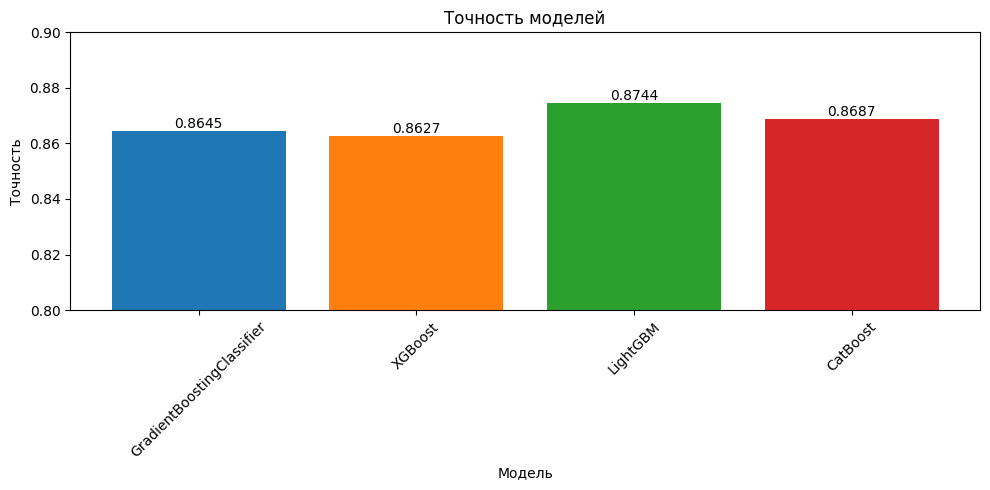

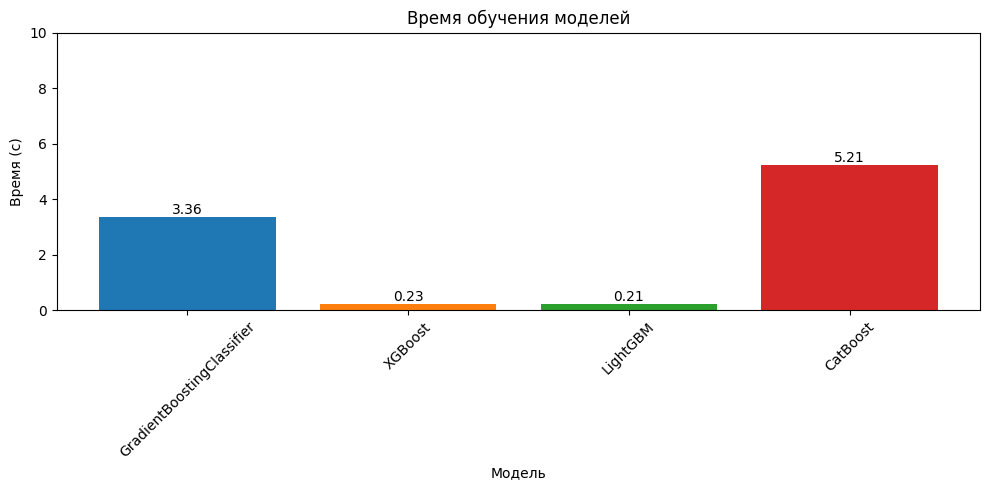

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool

# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/adult.csv')
display(data)

# Предобработка данных
data = data.replace({'?': np.nan}).dropna()
data['income_status'] = (data['income_status'] == '>50K').astype(int)

X = data.drop(['income_status'], axis=1)
y = data['income_status']

# Преобразование категориальных признаков
categorical_features = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Словарь для хранения результатов
results = {}

# GradientBoostingClassifier
start_time = time.time()
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
training_time_gbc = time.time() - start_time
y_pred_gbc = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
results['GradientBoostingClassifier'] = {'accuracy': accuracy_gbc, 'training_time': training_time_gbc}

# XGBoost
start_time = time.time()
dtrain = xgb.DMatrix(X_train.values, label=y_train)
dtest = xgb.DMatrix(X_test.values, label=y_test)
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'eta': 0.1, 'max_depth': 3}
num_rounds = 100
bst_xgb = xgb.train(params, dtrain, num_rounds)
training_time_xgb = time.time() - start_time
y_pred_xgb = (bst_xgb.predict(dtest) > 0.5).astype(int)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
results['XGBoost'] = {'accuracy': accuracy_xgb, 'training_time': training_time_xgb}

# LightGBM
start_time = time.time()
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 31, 'verbose': -1}
num_round = 100
bst_lgb = lgb.train(params, train_data, num_round, valid_sets=[test_data])
training_time_lgb = time.time() - start_time
y_pred_lgb = (bst_lgb.predict(X_test, num_iteration=bst_lgb.best_iteration) > 0.5).astype(int)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
results['LightGBM'] = {'accuracy': accuracy_lgb, 'training_time': training_time_lgb}

# CatBoost
start_time = time.time()
categorical_features_indices = [X_train.columns.get_loc(col) for col in X_train.columns if col.startswith(tuple(categorical_features))]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
test_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)
model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
model_cb.fit(train_pool)
training_time_cb = time.time() - start_time
y_pred_cb = model_cb.predict(test_pool)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
results['CatBoost'] = {'accuracy': accuracy_cb, 'training_time': training_time_cb}

# Построение графиков
models = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models]
training_times = [results[model]['training_time'] for model in models]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Цвета для столбиков

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracies[i]:.4f}', ha='center', va='bottom')
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.ylim(0.8, 0.9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}', ha='center', va='bottom')
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (с)')
plt.ylim(0, 10) # Диапазон шкалы по оси y
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Анализируя результаты обучения моделей градиентного бустинга на представленных графиках, можно сделать следующие выводы:

1. Точность моделей:
   - Все модели показывают достаточно высокую точность, превышающую 0.86.
   - Наибольшую точность демонстрирует модель LightGBM (0.8744), за ней следуют CatBoost (0.8687) и XGBoost (0.8627).
   - Модель GradientBoostingClassifier имеет несколько меньшую точность (0.8645) по сравнению с другими моделями.

2. Время обучения моделей:
   - Наблюдается значительная разница во времени обучения между моделями.
   - Модель CatBoost имеет самое длительное время обучения (5.21 секунды), что существенно больше, чем у других моделей.
   - GradientBoostingClassifier обучается за 3.36 секунды, что также относительно долго по сравнению с XGBoost и LightGBM.
   - Модели XGBoost и LightGBM демонстрируют очень быстрое обучение, занимая всего 0.23 и 0.21 секунды соответственно.

3. Соотношение точности и времени обучения:
   - Модель LightGBM показывает наилучший баланс между точностью и временем обучения. Она достигает наивысшей точности (0.8744) за очень короткое время (0.21 секунды).
   - XGBoost также демонстрирует хорошее соотношение точности и скорости обучения, уступая LightGBM лишь незначительно.
   - CatBoost обеспечивает высокую точность (0.8687), но требует значительно большего времени для обучения (5.21 секунды).
   - GradientBoostingClassifier уступает другим моделям как по точности, так и по времени обучения.

По результатам этого эксперимента, можно рекомендовать использование модели LightGBM, если приоритетом является достижение высокой точности при минимальном времени обучения. XGBoost также является хорошим выбором, обеспечивая баланс точности и скорости.

Если время обучения не является критичным фактором, а наибольшее значение имеет максимальная точность, то модель CatBoost может быть рассмотрена как альтернатива, но с учетом существенно большего времени обучения по сравнению с LightGBM и XGBoost.

### **Сравнительная таблица наиболее эффективных алгоритмов градиентного бустинга**

| Характеристика          | GradientBoostingClassifier | XGBoost                 | LightGBM                 | CatBoost                |
|-------------------------|----------------------------|-------------------------|--------------------------|-------------------------|
| **Библиотека**          | scikit-learn               | xgboost                 | lightgbm                 | catboost                |
| **Основная идея**       | Базовый градиентный бустинг| Оптимизированный GBDT   | Быстрый и масштабируемый GBDT | GBDT с поддержкой категориальных признаков |
| **Базовые модели**      | Деревья решений            | Деревья решений с регуляризацией | Деревья с Leaf-wise ростом | Симметричные деревья решений |
| **Регуляризация**       | Да                         | Да                      | Да                       | Да                      |
| **Использование Гессиана** | Нет                       | Да                      | Да                       | Да                      |
| **Обработка категориальных признаков** | Нет (требуется кодирование) | Нет (требуется кодирование) | Частично (встроенная поддержка) | Да (Ordered Target Statistics) |
| **Защита от переобучения** | Стандартная              | Регуляризация           | Регуляризация            | Ordered Boosting        |
| **Скорость обучения**   | Низкая                     | Высокая                 | Очень высокая            | Низкая                 |
| **Потребление памяти**  | Среднее                    | Выше среднего           | Низкое                   | Среднее                 |
| **Масштабируемость**    | Ограниченная               | Хорошая                 | Отличная                 | Хорошая                 |
| **Поддержка параллелизма** | Ограниченная             | Да                      | Да                       | Да                      |
| **Особенности**         | Простота использования     | Регуляризация, параллелизм | GOSS, EFB, Leaf-wise рост | Ordered Boosting, нативная обработка категориальных признаков |
| **Лучшие случаи применения** | Небольшие данные, прототипирование | Различные задачи, где важна точность | Большие данные, высокая скорость | Данные с категориальными признаками |

---

## **Краткая сводка по каждому из рассмотренных алгоритмов:**

Градиентный бустинг — это мощный ансамблевый метод, который комбинирует множество слабых моделей (обычно деревьев решений) для создания сильной предиктивной модели. На протяжении последних лет были разработаны различные реализации градиентного бустинга, каждая из которых предлагает свои улучшения и оптимизации. В этом анализе мы сравним четыре популярных алгоритма:

1. **GradientBoostingClassifier** из `scikit-learn`.
2. **XGBoost** (eXtreme Gradient Boosting).
3. **LightGBM** (Light Gradient Boosting Machine).
4. **CatBoost** (Categorical Boosting).

Мы рассмотрим их математические основы, особенности, преимущества и недостатки, а также представим сравнительную таблицу.

---

### 1. GradientBoostingClassifier (scikit-learn)

### Общая характеристика

- **Реализация**: Базовая реализация градиентного бустинга в библиотеке `scikit-learn`.
- **Базовые модели**: Использует деревья решений с поддержкой различных функций потерь.
- **Функция потерь**: Поддерживает различные функции потерь для регрессии и классификации.

### Математическое обоснование

- **Модель** строится в виде суммы базовых моделей:

  $
  F_M(\mathbf{x}) = F_0(\mathbf{x}) + \sum_{m=1}^M h_m(\mathbf{x}),
  $

  где $ h_m(\mathbf{x}) $ — очередная базовая модель.

- **Обучение** происходит путем последовательного добавления базовых моделей, каждая из которых минимизирует функцию потерь на текущих остатках.

### Преимущества

- **Простота использования**: Интегрирован в `scikit-learn`, что обеспечивает единый интерфейс.
- **Гибкость**: Поддерживает различные функции потерь и параметры базовых моделей.
- **Подходит для небольших данных**: Эффективен на небольших и средних наборах данных.

### Недостатки

- **Скорость обучения**: Медленнее по сравнению с другими реализациями на больших данных.
- **Отсутствие оптимизаций**: Нет специальных оптимизаций для категориальных признаков или масштабируемости.

---

### 2. XGBoost (eXtreme Gradient Boosting)

### Общая характеристика

- **Реализация**: Оптимизированная и регуляризованная версия градиентного бустинга.
- **Базовые модели**: Деревья решений с регуляризацией.
- **Особенности**: Использует вторые производные (Гессиан) для более точной оптимизации; поддерживает параллельное и распределенное обучение.

### Математическое обоснование

- **Целевая функция** с регуляризацией:

  $
  \text{Obj} = \sum_{i=1}^N L(y_i, \hat{y}_i^{(t)}) + \sum_{m=1}^t \Omega(f_m),
  $

  где

  $
  \Omega(f) = \gamma T + \frac{1}{2} \lambda \| \mathbf{w} \|^2,
  $

  $ T $ — число листьев, $ \lambda $ и $ \gamma $ — параметры регуляризации.

- **Использование вторых производных** позволяет более точно аппроксимировать функцию потерь и ускорять сходимость.

### Преимущества

- **Высокая производительность**: Быстрое обучение благодаря оптимизациям и параллелизации.
- **Регуляризация**: Помогает избежать переобучения.
- **Гибкость**: Поддержка различных функций потерь и кастомизации.

### Недостатки

- **Обработка категориальных признаков**: Необходимо предварительное кодирование (One-Hot Encoding), что может быть неэффективно.
- **Потребление памяти**: Может потреблять больше памяти на больших наборах данных.

---

### 3. LightGBM (Light Gradient Boosting Machine)

### Общая характеристика

- **Реализация**: Быстрая и масштабируемая реализация градиентного бустинга от Microsoft.
- **Базовые модели**: Деревья решений с особым способом роста (Leaf-wise).
- **Особенности**: Использует техники **Gradient-based One-Side Sampling (GOSS)** и **Exclusive Feature Bundling (EFB)** для ускорения обучения.

### Математическое обоснование

- **Leaf-wise Growth**: Деревья растут, разделяя листья с наибольшим приростом информации, что делает их более глубокими и эффективными.

- **GOSS**: Отбирает объекты с большими градиентами для обучения, сохраняя информацию об ошибках.

- **EFB**: Объединяет взаимно исключающие признаки для уменьшения размерности.

### Преимущества

- **Высокая скорость обучения**: Эффективен на больших данных.
- **Низкое потребление памяти**: Оптимизации позволяют экономить память.
- **Гибкость**: Поддержка различных функций потерь и параметров модели.

### Недостатки

- **Переобучение**: из-за Leaf-wise роста деревьев возможно переобучение на некоторых данных.
- **Обработка категориальных признаков**: Требует предварительного кодирования, хотя имеет встроенную поддержку.

---

### 4. CatBoost (Categorical Boosting)

### Общая характеристика

- **Реализация**: Алгоритм от компании Яндекс, специально разработанный для обработки категориальных признаков.
- **Базовые модели**: Симметричные деревья решений.
- **Особенности**: Использует **Ordered Boosting** и **Ordered Target Statistics** для предотвращения таргет-лека и переобучения.

### Математическое обоснование

- **Ordered Boosting**: На каждой итерации обучение базируется только на предыдущих данных, исключая просмотр будущих значений таргета.

- **Ordered Target Statistics**: Категориальные признаки кодируются на основе средней целевой переменной, вычисленной на предыдущих данных, предотвращая смещение.

### Преимущества

- **Нативная обработка категориальных признаков**: Нет необходимости в предварительном кодировании.
- **Устойчивость к переобучению**: Ordered Boosting снижает риск переобучения.
- **Высокая точность**: Особенно на данных с категориальными признаками.

### Недостатки

- **Скорость обучения**: Может быть медленнее по сравнению с LightGBM на больших данных.
- **Потребление памяти**: Работа с категориальными признаками может требовать больше памяти.

---

# **Перечень всех ансамблей в `sklearn.ensemble` с подробным описанием**

Модуль `sklearn.ensemble` библиотеки Scikit-learn предоставляет реализацию различных ансамблевых методов машинного обучения. Ансамблевые методы комбинируют прогнозы нескольких моделей (называемых базовыми оценивателями) с целью улучшения общей производительности по сравнению с использованием одной модели. Они способны повысить точность и устойчивость прогнозов за счёт снижения дисперсии (бэггинг), снижения смещения (бустинг) или путём объединения разных типов моделей (вотинг, стекинг).

Ниже представлен подробный обзор всех ансамблей, доступных в `sklearn.ensemble`.

---

## 1. **RandomForestClassifier**

### Описание

`RandomForestClassifier` реализует алгоритм случайного леса для задач классификации. Случайный лес строит множество деревьев решений, каждое из которых обучается на случайной подвыборке данных с заменой (бутстрэп) и использует случайный набор признаков при разбиении узлов. Предсказания отдельных деревьев объединяются путём голосования.

### Особенности

- **Базовые оцениватели**: Деревья решений (`DecisionTreeClassifier`).
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Высокая точность и устойчивость к переобучению.
  - Можно оценивать важность признаков.
  - Обрабатывает большой объём данных.
- **Параметры**:
  - `n_estimators`: Количество деревьев в лесу.
  - `max_features`: Максимальное количество признаков, используемых при разбиении.

---

## 2. **RandomForestRegressor**

### Описание

`RandomForestRegressor` аналогичен `RandomForestClassifier`, но предназначен для задач регрессии. Он строит ансамбль деревьев решений, предсказания которых усредняются для получения финального результата.

### Особенности

- **Базовые оцениватели**: Деревья решений (`DecisionTreeRegressor`).
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Высокая точность предсказаний.
  - Устойчивость к переобучению.
  - Возможность оценки важности признаков.
- **Параметры**:
  - Аналогичны `RandomForestClassifier`.

---

## 3. **ExtraTreesClassifier**

### Описание

`ExtraTreesClassifier` реализует ансамбль "экстремально случайных деревьев" для задач классификации. В отличие от случайного леса, пороги разделения в каждом узле выбираются случайно, что увеличивает разнообразие деревьев и может улучшить обобщающую способность модели.

### Особенности

- **Базовые оцениватели**: Деревья решений (`DecisionTreeClassifier`) с дополнительной случайностью.
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Быстрое обучение и предсказание.
  - Снижение дисперсии модели.
  - Устойчивость к переобучению.
- **Параметры**:
  - Похожие на `RandomForestClassifier`, но с дополнительной случайностью в разбиении узлов.

---

## 4. **ExtraTreesRegressor**

### Описание

`ExtraTreesRegressor` является регрессионным аналогом `ExtraTreesClassifier` и предназначен для задач регрессии. Использует ансамбль деревьев с максимальной случайностью.

### Особенности

- **Базовые оцениватели**: Деревья решений (`DecisionTreeRegressor`) с дополнительной случайностью.
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Высокая скорость обучения.
  - Устойчивость к переобучению.
- **Параметры**:
  - Аналогичны `ExtraTreesClassifier`.

---

## 5. **BaggingClassifier**

### Описание

`BaggingClassifier` реализует бэггинг (bootstrap aggregating) для задач классификации. Он обучает множество базовых классификаторов на случайных подвыборках данных и объединяет их предсказания путём голосования.

### Особенности

- **Базовые оцениватели**: Любые классификаторы (по умолчанию `DecisionTreeClassifier`).
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Снижение дисперсии модели.
  - Простота параллелизации обучения.
- **Параметры**:
  - `base_estimator`: Тип базового классификатора.
  - `n_estimators`: Количество базовых моделей.
  - `max_samples`, `max_features`: Размеры случайных подвыборок данных и признаков.

---

## 6. **BaggingRegressor**

### Описание

`BaggingRegressor` является регрессионным аналогом `BaggingClassifier` и предназначен для задач регрессии. Он объединяет предсказания базовых регрессоров путём усреднения.

### Особенности

- **Базовые оцениватели**: Любые регрессоры (по умолчанию `DecisionTreeRegressor`).
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Снижение дисперсии.
  - Устойчивость к переобучению.
- **Параметры**:
  - Аналогичны `BaggingClassifier`.

---

## 7. **AdaBoostClassifier**

### Описание

`AdaBoostClassifier` реализует алгоритм адаптивного бустинга (AdaBoost) для задач классификации. Он обучает последовательность слабых классификаторов, каждый из которых пытается исправить ошибки предыдущих, уделяя больше внимания неправильно классифицированным образцам.

### Особенности

- **Базовые оцениватели**: Обычно простые классификаторы (например, деревья решений глубины 1 — "пни").
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Способен улучшить производительность слабых классификаторов.
  - Устойчив к переобучению на данных без шума.
- **Параметры**:
  - `n_estimators`: Количество базовых моделей.
  - `learning_rate`: Скорость обучения.
  - `algorithm`: Тип алгоритма бустинга ('SAMME' или 'SAMME.R').

---

## 8. **AdaBoostRegressor**

### Описание

`AdaBoostRegressor` является регрессионным аналогом `AdaBoostClassifier`. Он обучает последовательность слабых регрессоров, каждый из которых пытается уменьшить ошибку предыдущих.

### Особенности

- **Базовые оцениватели**: Обычно простые регрессоры.
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Улучшение производительности слабых регрессоров.
  - Хорошо работает на простых моделях.
- **Параметры**:
  - Аналогичны `AdaBoostClassifier`.

---

## 9. **GradientBoostingClassifier**

### Описание

`GradientBoostingClassifier` реализует градиентный бустинг для задач классификации. Модель обучает последовательность деревьев решений, каждое из которых пытается минимизировать функцию потерь, двигаясь в направлении отрицательного градиента ошибки.

### Особенности

- **Базовые оцениватели**: Деревья решений (`DecisionTreeClassifier`).
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Высокая точность на разнообразных задачах.
  - Поддержка различных функций потерь.
- **Параметры**:
  - `loss`: Функция потерь.
  - `learning_rate`: Скорость обучения.
  - `n_estimators`: Количество итераций бустинга.
  - `max_depth`: Глубина деревьев.

---

## 10. **GradientBoostingRegressor**

### Описание

`GradientBoostingRegressor` является регрессионным аналогом `GradientBoostingClassifier` и использует градиентный бустинг для задач регрессии.

### Особенности

- **Базовые оцениватели**: Деревья решений (`DecisionTreeRegressor`).
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Высокая точность предсказаний.
  - Гибкость в выборе функции потерь.
- **Параметры**:
  - Аналогичны `GradientBoostingClassifier`.

---

## 11. **HistGradientBoostingClassifier**

### Описание

`HistGradientBoostingClassifier` — высокопроизводительная реализация градиентного бустинга, основанная на обучении с использованием гистограмм. Хорошо масштабируется и эффективна на больших данных.

### Особенности

- **Базовые оцениватели**: Деревья решений с гистограммным построением.
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Быстрое обучение.
  - Низкое потребление памяти.
  - Поддержка категориальных признаков.
- **Параметры**:
  - `loss`: Функция потерь.
  - `learning_rate`: Скорость обучения.
  - `max_iter`: Количество итераций бустинга.
  - `max_leaf_nodes`: Максимальное число листьев в дереве.

---

## 12. **HistGradientBoostingRegressor**

### Описание

`HistGradientBoostingRegressor` — регрессионный аналог `HistGradientBoostingClassifier`.

### Особенности

- **Базовые оцениватели**: Деревья решений с гистограммным построением.
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Высокая производительность на больших наборах данных.
  - Гибкость в настройке.
- **Параметры**:
  - Аналогичны `HistGradientBoostingClassifier`.

---

## 13. **VotingClassifier**

### Описание

`VotingClassifier` объединяет предсказания нескольких различных классификаторов путём голосования. Поддерживает жесткое голосование (выбор класса с большинством голосов) и мягкое голосование (усреднение вероятностей предсказаний).

### Особенности

- **Базовые оцениватели**: Любые классификаторы.
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Комбинация разных моделей для улучшения точности.
  - Простота в использовании.
- **Параметры**:
  - `estimators`: Список базовых классификаторов.
  - `voting`: Тип голосования ('hard' или 'soft').

---

## 14. **VotingRegressor**

### Описание

`VotingRegressor` объединяет предсказания нескольких регрессоров путём усреднения.

### Особенности

- **Базовые оцениватели**: Любые регрессоры.
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Повышение стабильности и точности.
- **Параметры**:
  - `estimators`: Список базовых регрессоров.

---

## 15. **StackingClassifier**

### Описание

`StackingClassifier` реализует стекинг для задач классификации. Он обучает несколько базовых классификаторов и мета-классификатор, который комбинирует их предсказания.

### Особенности

- **Базовые оцениватели**: Любые классификаторы.
- **Мета-оцениватель**: Классификатор для комбинирования предсказаний базовых моделей.
- **Применимо к**: Задачам классификации.
- **Преимущества**:
  - Улавливает сложные зависимости между моделями.
  - Может улучшить обобщающую способность.
- **Параметры**:
  - `estimators`: Список базовых классификаторов.
  - `final_estimator`: Мета-классификатор.

---

## 16. **StackingRegressor**

### Описание

`StackingRegressor` аналогичен `StackingClassifier`, но предназначен для задач регрессии.

### Особенности

- **Базовые оцениватели**: Любые регрессоры.
- **Мета-оцениватель**: Регрессор для комбинирования предсказаний.
- **Применимо к**: Задачам регрессии.
- **Преимущества**:
  - Улучшение точности путём объединения разных моделей.
- **Параметры**:
  - Аналогичны `StackingClassifier`.

---

## 17. **IsolationForest**

### Описание

`IsolationForest` реализует алгоритм обнаружения выбросов. Использует случайные деревья для изоляции наблюдений, где объекты, требующие меньшее количество разбиений для изоляции, считаются выбросами.

### Особенности

- **Базовые оцениватели**: Деревья изоляции.
- **Применимо к**: Обнаружению аномалий и выбросов.
- **Преимущества**:
  - Эффективность на больших наборах данных.
  - Не требует маркированных данных (обучение без учителя).
- **Параметры**:
  - `n_estimators`: Количество деревьев.
  - `max_samples`: Количество образцов для построения каждого дерева.

---

### Обобщённая сравнительная таблица

| Метод                        | Задача             | Базовые оцениватели          | Комбинирование             | Особенности                           |
|------------------------------|--------------------|------------------------------|----------------------------|----------------------------------------|
| RandomForestClassifier       | Классификация      | Деревья решений              | Голосование                | Случайные подвыборки и признаки        |
| RandomForestRegressor        | Регрессия          | Деревья решений              | Усреднение                 | Случайные подвыборки и признаки        |
| ExtraTreesClassifier         | Классификация      | Деревья решений (случ. пороги)| Голосование               | Дополнительная случайность             |
| ExtraTreesRegressor          | Регрессия          | Деревья решений (случ. пороги)| Усреднение                | Дополнительная случайность             |
| BaggingClassifier            | Классификация      | Любые классификаторы         | Голосование                | Бэггинг                                |
| BaggingRegressor             | Регрессия          | Любые регрессоры             | Усреднение                 | Бэггинг                                |
| AdaBoostClassifier           | Классификация      | Слабые классификаторы        | Взвешенное голосование     | Адаптивный бустинг                     |
| AdaBoostRegressor            | Регрессия          | Слабые регрессоры            | Взвешенное усреднение      | Адаптивный бустинг                     |
| GradientBoostingClassifier   | Классификация      | Деревья решений              | Суммирование               | Градиентный бустинг                    |
| GradientBoostingRegressor    | Регрессия          | Деревья решений              | Суммирование               | Градиентный бустинг                    |
| HistGradientBoostingClassifier| Классификация     | Деревья решений (гистограммы)| Суммирование               | Быстрое обучение, масштабируемость     |
| HistGradientBoostingRegressor | Регрессия         | Деревья решений (гистограммы)| Суммирование               | Быстрое обучение, масштабируемость     |
| VotingClassifier             | Классификация      | Различные классификаторы     | Голосование ('hard'/'soft')| Комбинация разных моделей              |
| VotingRegressor              | Регрессия          | Различные регрессоры         | Усреднение                 | Комбинация разных моделей              |
| StackingClassifier           | Классификация      | Различные классификаторы     | Мета-классификатор         | Обучение мета-модели                   |
| StackingRegressor            | Регрессия          | Различные регрессоры         | Мета-регрессор             | Обучение мета-модели                   |
| IsolationForest              | Аномалия           | Деревья изоляции             | -                          | Обнаружение выбросов                   |

---

Модуль `sklearn.ensemble` предоставляет широкий спектр ансамблевых методов для решения различных задач машинного обучения, включая классификацию, регрессию и обнаружение аномалий. Каждый из методов имеет свои особенности и преимущества:

- **Бэггинг методы** (например, `BaggingClassifier`, `RandomForestClassifier`) полезны для снижения дисперсии и устойчивы к переобучению.
- **Бустинг методы** (например, `AdaBoostClassifier`, `GradientBoostingClassifier`) направлены на снижение смещения и могут обеспечить высокую точность.
- **Комбинированные методы** (например, `VotingClassifier`, `StackingClassifier`) позволяют объединить разные модели для улучшения обобщающей способности.

Выбор оптимального ансамблевого метода зависит от конкретной задачи, характера данных и требований к модели.

# **Дополнительный ансамблевый метод: Стекинг + увеличение данных (Data Augmentation)**

В машинном обучении ансамблевые методы широко используются для улучшения производительности моделей за счёт объединения нескольких алгоритмов. Ранее мы рассмотрели **бэггинг** как один из таких методов. Теперь углубимся в два других подхода:

1. **Стекинг (Stacking)**: Более сложный ансамблевый метод, где предсказания базовых моделей используются в качестве признаков для **мета-модели**.
2. **Увеличение данных (Data Augmentation)**: Техника увеличения размера обучающей выборки посредством создания новых синтетических данных или трансформации существующих.

## **1. Стекинг (Stacking)**

### **Основная идея**

**Стекинг** — это ансамблевый метод, при котором несколько базовых моделей обучаются на одном и том же наборе данных, а их предсказания используются для обучения дополнительной, более сложной модели — **мета-модели**. Мета-модель учится комбинировать предсказания базовых моделей, чтобы улучшить общую производительность.

### **Что такое мета-модель?**

**Мета-модель** — это модель верхнего уровня, которая обучается на выходах базовых моделей. Она рассматривает предсказания базовых моделей как входные признаки и учится делать окончательное предсказание. Мета-модель играет роль "модели моделей", комбинируя их выводы и корректируя ошибки.

### **Как конкретно происходит процесс стекинга?**

Процесс стекинга можно разбить на следующие шаги:

1. **Обучение базовых моделей** на обучающей выборке $ (X_{\text{train}}, y_{\text{train}}) $.

2. **Получение предсказаний базовых моделей**:
   - Используется техника k-fold кросс-валидации для получения предсказаний базовых моделей на обучающих данных без переобучения.
   - Предсказания базовых моделей на обучающих данных собираются и используются в качестве новых признаков.

3. **Обучение мета-модели** на новых признаках (предсказаниях базовых моделей) и истинных целевых значениях $ y_{\text{train}} $.

4. **Предсказание на тестовой выборке**:
   - Получаем предсказания базовых моделей на тестовых данных.
   - Используем мета-модель для окончательного предсказания, принимая эти предсказания в качестве входных данных.

### **Почему важно использовать кросс-валидацию?**

Использование кросс-валидации при получении предсказаний базовых моделей на обучающих данных позволяет избежать переобучения мета-модели. Она получает предсказания на данных, на которых базовые модели не обучались, что обеспечивает более реальное представление их способности к обобщению.

### **Пример стекинга с использованием разных моделей**

Рассмотрим задачу регрессии на основе датасета о цене жилья в Бостоне.

#### Шаг 1: Импорт библиотек и данных

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

*Примечание*: В последних версиях Scikit-Learn `load_boston` может быть удалён. Альтернативой может служить `fetch_california_housing`.

#### Шаг 2: Загрузка и подготовка данных

In [ ]:
# Загрузка данных
boston = fetch_california_housing()
X = boston.data
y = boston.target

# Разделение на обучающую и тестовую выборки
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### Шаг 3: Определение базовых моделей и мета-модели

In [ ]:
# Базовые модели
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Мета-модель
meta_model = LinearRegression()

#### Шаг 4: Получение предсказаний базовых моделей на обучающей выборке

In [ ]:
from sklearn.model_selection import KFold

# Создание массивов для хранения предсказаний
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
train_meta_features = np.zeros((X_train_full.shape[0], len(base_models)))
test_meta_features = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    test_fold_predictions = []
    for train_index, val_index in kf.split(X_train_full):
        X_train_kf, X_val_kf = X_train_full[train_index], X_train_full[val_index]
        y_train_kf, y_val_kf = y_train_full[train_index], y_train_full[val_index]

        # Обучение базовой модели
        model.fit(X_train_kf, y_train_kf)

        # Предсказания на валидационных данных
        val_pred = model.predict(X_val_kf)
        train_meta_features[val_index, i] = val_pred

    # Обучение модели на всей обучающей выборке
    model.fit(X_train_full, y_train_full)
    # Предсказания на тестовых данных
    test_meta_features[:, i] = model.predict(X_test)

**Комментарии:**

- **train_meta_features**: Матрица размером $ (n_{\text{train}}, n_{\text{models}}) $, где хранятся предсказания базовых моделей на обучающих данных.
- **test_meta_features**: Матрица предсказаний базовых моделей на тестовых данных.

#### Шаг 5: Обучение мета-модели

In [ ]:
# Обучение мета-модели на предсказаниях базовых моделей
meta_model.fit(train_meta_features, y_train_full)

LinearRegression()

#### Шаг 6: Предсказание и оценка модели

In [ ]:
# Предсказания мета-модели
meta_pred = meta_model.predict(test_meta_features)

# Оценка производительности
mse_meta = mean_squared_error(y_test, meta_pred)
print(f"Mean Squared Error (Stacking): {mse_meta:.4f}")

Mean Squared Error (Stacking): 0.2558


#### Шаг 7: Сравнение с отдельными базовыми моделями

In [ ]:
for name, model in base_models:
    # Обучение на всей обучающей выборке
    model.fit(X_train_full, y_train_full)
    # Предсказания на тестовых данных
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({name}): {mse:.4f}")

Mean Squared Error (lr): 0.5559
Mean Squared Error (dt): 0.4952
Mean Squared Error (rf): 0.2554


#### **Выводы:**

Вы можете обнаружить, что стекинг (с использованием мета-модели) показывает лучшую производительность по сравнению с каждой из базовых моделей. Это происходит потому, что мета-модель учится уменьшать ошибки базовых моделей, комбинируя их предсказания наиболее эффективным образом.

## **2. Увеличение данных (Data Augmentation)**

### **Основная идея**

**Увеличение данных** — это набор техник, позволяющих увеличить объём обучающих данных за счёт создания новых, синтетических образцов. Это особенно полезно, когда данных недостаточно или они несбалансированы.

### **Методы увеличения данных**

1. **SMOTE (Synthetic Minority Over-sampling Technique)**: Генерация новых образцов для класса меньшинства.
   
2. **Аугментация изображений**: Применение трансформаций к изображениям (повороты, сдвиги, отражения и т.д.).
   
3. **Генеративные модели**: Использование моделей, таких как GAN или VAE, для генерации новых данных.

### **Пример использования SMOTE**

**SMOTE (Synthetic Minority Over-sampling Technique)** — это алгоритм, используемый в машинном обучении для решения проблемы дисбаланса классов в наборах данных. Дисбаланс классов возникает, когда в наборе данных один класс представлен значительно большим количеством примеров, чем другой.


#### **Как работает SMOTE?**




SMOTE создает новые синтетические образцы для класса меньшинства, чтобы сбалансировать распределение классов. Это достигается путем интерполяции между существующими образцами класса меньшинства. Вот как это происходит:

1. **Выбор образцов:** Для каждого образца из класса меньшинства выбирается несколько ближайших соседей (обычно 5) из того же класса.

2. **Генерация новых образцов:** Для каждого выбранного образца и его соседей создаются новые синтетические образцы. Это делается путем линейной интерполяции между образцом и его соседями. Например, если у вас есть два образца, $x_1$ и $x_2$, новый образец может быть сгенерирован как

   $$ x_{\text{new}} = x_1 + \text{rand}(0, 1) \times (x_2 - x_1), $$

   где $\text{rand}(0, 1)$ — случайное число от 0 до 1.

3. **Повторение процесса:** Этот процесс повторяется для всех образцов класса меньшинства, пока не будет достигнуто желаемое количество новых образцов.



#### **Преимущества SMOTE:**

- **Улучшение качества модели:** За счет балансировки классов модели машинного обучения могут лучше обучаться и давать более точные предсказания.
- **Избежание переобучения:** В отличие от простого дублирования образцов класса меньшинства, SMOTE создает новые, уникальные образцы, что помогает избежать переобучения модели на повторяющихся данных.



#### **Недостатки SMOTE:**

- **Создание шумных данных:** Поскольку SMOTE создает новые данные путем интерполяции, существует риск создания шумных или нерепрезентативных данных, особенно если данные изначально содержат выбросы.
- **Не подходит для всех типов данных:** SMOTE лучше всего работает с числовыми данными и может быть менее эффективен для категориальных данных без предварительной обработки.

Рассмотрим задачу классификации на несбалансированных данных.

#### Шаг 1: Импорт необходимых библиотек

In [ ]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

*Примечание*: Убедитесь, что библиотека `imbalanced-learn` установлена (`pip install imbalanced-learn`).

#### Шаг 2: Загрузка несбалансированного набора данных [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) и формирование обучающей выборки

In [ ]:
# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/shalakasaraogi/credit-card-fraud-detection/refs/heads/main/csv%20files/creditcard.csv')

# Разделение на признаки и целевую переменную
X = data.drop('Class', axis=1)
y = data['Class']

print(f"Распределение классов до увеличения: {Counter(y)}")

# Стратифицированное разделение данных на обучающую и тестовую выборки
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Распределение классов до увеличения: Counter({0: 19936, 1: 64})


#### Шаг 3: Применение SMOTE

In [ ]:
# Применение SMOTE только к обучающей выборке
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_orig, y_train_orig)

print(f"Распределение классов после увеличения: {Counter(y_train_res)}")

Распределение классов после увеличения: Counter({0: 15949, 1: 15949})


#### Шаг 4: Обучение модели на исходных и увеличенных данных

In [ ]:
# Модель
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Используем все доступные ядра
)
# Кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

orig_scores = []
res_scores = []

for train_index, test_index in skf.split(X_train_orig, y_train_orig):
    X_train, X_test = X_train_orig.iloc[train_index], X_train_orig.iloc[test_index]
    y_train, y_test = y_train_orig.iloc[train_index], y_train_orig.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    orig_scores.append(model.score(X_test, y_test))

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    model.fit(X_train_res, y_train_res)
    y_pred_res = model.predict(X_test)
    res_scores.append(model.score(X_test, y_test))

print(f"Средняя точность на исходных данных: {np.mean(orig_scores):.4f}")
print(f"Средняя точность на увеличенных данных: {np.mean(res_scores):.4f}")

# Обучение на всей обучающей выборке с увеличением
model.fit(X_train_res, y_train_res)
y_pred_res = model.predict(X_test_orig)

Средняя точность на исходных данных: 0.9973
Средняя точность на увеличенных данных: 0.9971


#### Шаг 5: Оценка моделей

In [ ]:
print("Отчет классификации на тестовой выборке:")
print(classification_report(y_test_orig, y_pred_res))

print("Матрица ошибок на тестовой выборке:")
print(confusion_matrix(y_test_orig, y_pred_res))

Отчет классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3987
           1       0.25      0.15      0.19        13

    accuracy                           1.00      4000
   macro avg       0.62      0.58      0.59      4000
weighted avg       0.99      1.00      1.00      4000

Матрица ошибок на тестовой выборке:
[[3981    6]
 [  11    2]]


#### **Обсуждение**

- **На исходных данных**: Модель может игнорировать класс меньшинства, показывая низкую полноту (recall) для него.
- **На увеличенных данных**: Модель должна лучше распознавать класс меньшинства благодаря сбалансированному набору данных.

### **Заключение**

**Стекинг** и **аугментация** — эффективные методы, способные значительно улучшить производительность моделей машинного обучения.

- **Стекинг**: Позволяет комбинировать предсказания различных моделей, обучить мета-модель, которая эффективно агрегирует эти предсказания, улучшая итоговую метрику. Важной частью процесса является предотвращение переобучения мета-модели через использование кросс-валидации при сборе предсказаний базовых моделей.

- **Аугментация данных**: Критически важно в ситуациях с недостаточным количеством данных или их несбалансированностью. Правильно применённые техники, такие как SMOTE, могут улучшить способности модели к обобщению и повысить точность на классах меньшинства.

**Рекомендации:**

- При использовании стекинга экспериментируйте с разными базовыми моделями и мета-моделями. Возможно, нелинейная мета-модель (например, градиентный бустинг) приведёт к ещё лучшим результатам.
  
- В случае увеличения данных контролируйте качество синтетических образцов и воздействие на модель. Не всегда увеличение данных приводит к улучшению; важно оценивать результаты на валидационной выборке.

**Резюмируя:**

- **Мета-модель** в стекинге играет решающую роль. Она обучается на скрытых паттернах в предсказаниях базовых моделей и может исправлять их ошибки, что ведёт к более точным предсказаниям.

- **Процесс обучения** в стекинге двухэтапный: сначала обучаются базовые модели, затем на их предсказаниях обучается мета-модель.

- **Важность кросс-валидации**: Без неё мета-модель может переобучиться на предсказаниях базовых моделей, которые уже видели эти данные, что снизит способность обобщения на новых данных.